### Phase 2

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import geopandas as gpd
import datetime 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Projection Dataset.csv")
df.shape

(419, 7)

In [3]:
IPC_2001_2012 = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
IPC_2001_2012.shape

(9017, 33)

In [4]:
df.head()

STATE/UT  Year  Population No. in  thousand AREA in (km2)  \
0  Andhra Pradesh  2001                        76542      2,75,045   
1  Andhra Pradesh  2002                        77710      2,75,045   
2  Andhra Pradesh  2003                        78616      2,75,045   
3  Andhra Pradesh  2004                        79502      2,75,045   
4  Andhra Pradesh  2005                        80369      2,75,045   

   Literate Population No. in thousand  Literacy Rate  Total Crime  
0                                53579           70.0        49628  
1                                54397           70.0        55390  
2                                55031           70.0        66588  
3                                55651           70.0        65660  
4                                56258           70.0        65552

In [5]:
IPC_2001_2012.head()

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          50                      46  ...     30                1131   
1          23                      53  ...     69                1543   
2          27                      59  ...     38                2088   
3          20                      25  ...     23                 795   
4          23                      49  ...     41                1244   

   DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0            16                                                149     
1             7                                                118     
2            14                                                112     
3            17                                                126     
4            12                                                109     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   
3                          38                                   57   
4                          58                                  247   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          181   
1                                            0                          270   
2                                            0                          404   
3                                            0                          233   
4                                            0                          431   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  
0              1518              4154  
1               754              4125  
2              1262              5818  
3              1181              3140  
4              2313              6507  

[5 rows x 33 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   STATE/UT                             419 non-null    object 
 1   Year                                 419 non-null    int64  
 2   Population No. in  thousand          419 non-null    int64  
 3   AREA in (km2)                        419 non-null    object 
 4   Literate Population No. in thousand  419 non-null    int64  
 5   Literacy Rate                        419 non-null    float64
 6   Total Crime                          419 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


In [7]:
IPC_2001_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [8]:
df.isnull().sum()

STATE/UT                               0
Year                                   0
Population No. in  thousand            0
AREA in (km2)                          0
Literate Population No. in thousand    0
Literacy Rate                          0
Total Crime                            0
dtype: int64

In [9]:
IPC_2001_2012.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [10]:
df.nunique()

STATE/UT                                35
Year                                    12
Population No. in  thousand            411
AREA in (km2)                           35
Literate Population No. in thousand    410
Literacy Rate                           37
Total Crime                            395
dtype: int64

In [11]:
IPC_2001_2012.nunique()

STATE/UT                                                 35
DISTRICT                                                808
YEAR                                                     12
MURDER                                                  477
ATTEMPT TO MURDER                                       514
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               171
RAPE                                                    420
CUSTODIAL RAPE                                            5
OTHER RAPE                                              419
KIDNAPPING & ABDUCTION                                  534
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             460
KIDNAPPING AND ABDUCTION OF OTHERS                      307
DACOITY                                                 227
PREPARATION AND ASSEMBLY FOR DACOITY                    191
ROBBERY                                                 455
BURGLARY                                                922
THEFT                                   

In [12]:
df.describe().T


count          mean           std  \
Year                                 419.0   2006.486874      3.449803   
Population No. in  thousand          419.0  32267.221957  41075.635694   
Literate Population No. in thousand  419.0  22587.081146  28752.927542   
Literacy Rate                        419.0     70.012387      0.076142   
Total Crime                          419.0  23470.560859  29279.559581   

                                        min     25%      50%       75%  \
Year                                 2001.0  2003.5   2006.0   2009.00   
Population No. in  thousand            61.0  1379.0  16291.0  57331.00   
Literate Population No. in thousand    43.0   965.0  11404.0  40131.50   
Literacy Rate                          69.7    70.0     70.0     70.01   
Total Crime                             8.0  1468.0  12752.0  41999.00   

                                           max  
Year                                   2012.00  
Population No. in  thousand          206312.00  
Literate Population No. in thousand  144418.00  
Literacy Rate                            70.67  
Total Crime                          149568.00

In [13]:
df.columns = df.columns.str.upper()
df.head(2)

STATE/UT  YEAR  POPULATION NO. IN  THOUSAND AREA IN (KM2)  \
0  Andhra Pradesh  2001                        76542      2,75,045   
1  Andhra Pradesh  2002                        77710      2,75,045   

   LITERATE POPULATION NO. IN THOUSAND  LITERACY RATE  TOTAL CRIME  
0                                53579           70.0        49628  
1                                54397           70.0        55390

In [14]:
df['STATE/UT'] = df['STATE/UT'].str.upper()

In [15]:
print(list(IPC_2001_2012["STATE/UT"].unique()))
print(len(list(IPC_2001_2012["STATE/UT"].unique())))

['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI', 'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY']
35


In [16]:
IPC_2001_2012.describe().T

count         mean  \
YEAR                                                9017.0  2006.629034   
MURDER                                              9017.0    89.285350   
ATTEMPT TO MURDER                                   9017.0    78.069646   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER           9017.0     9.895531   
RAPE                                                9017.0    53.041366   
CUSTODIAL RAPE                                      9017.0     0.005767   
OTHER RAPE                                          9017.0    53.035599   
KIDNAPPING & ABDUCTION                              9017.0    79.152046   
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS         9017.0    58.535433   
KIDNAPPING AND ABDUCTION OF OTHERS                  9017.0    20.616613   
DACOITY                                             9017.0    13.177110   
PREPARATION AND ASSEMBLY FOR DACOITY                9017.0     7.084618   
ROBBERY                                             9017.0    55.066430   
BURGLARY                                            9017.0   247.829433   
THEFT                                               9017.0   776.428968   
AUTO THEFT                                          9017.0   281.772208   
OTHER THEFT                                         9017.0   494.656759   
RIOTS                                               9017.0   171.881335   
CRIMINAL BREACH OF TRUST                            9017.0    40.816458   
CHEATING                                            9017.0   170.255517   
COUNTERFIETING                                      9017.0     5.926140   
ARSON                                               9017.0    25.219918   
HURT/GREVIOUS HURT                                  9017.0   747.893091   
DOWRY DEATHS                                        9017.0    20.228901   
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MOD...  9017.0   100.511257   
INSULT TO MODESTY OF WOMEN                          9017.0    27.515582   
CRUELTY BY HUSBAND OR HIS RELATIVES                 9017.0   194.122435   
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES         9017.0     0.197849   
CAUSING DEATH BY NEGLIGENCE                         9017.0   222.216702   
OTHER IPC CRIMES                                    9017.0  2174.299434   
TOTAL IPC CRIMES                                    9017.0  5310.115116   

                                                             std     min  \
YEAR                                                    3.463623  2001.0   
MURDER                                                327.275030     0.0   
ATTEMPT TO MURDER                                     303.446020     0.0   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              59.521657     0.0   
RAPE                                                  190.741450     0.0   
CUSTODIAL RAPE                                          0.115223     0.0   
OTHER RAPE                                            190.725474     0.0   
KIDNAPPING & ABDUCTION                                317.630964     0.0   
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS           246.937464     0.0   
KIDNAPPING AND ABDUCTION OF OTHERS                     88.586415     0.0   
DACOITY                                                56.778798     0.0   
PREPARATION AND ASSEMBLY FOR DACOITY                   42.350314     0.0   
ROBBERY                                               220.576876     0.0   
BURGLARY                                              941.233426     0.0   
THEFT                                                2935.008640     0.0   
AUTO THEFT                                           1164.677928     0.0   
OTHER THEFT                                          1895.366707     0.0   
RIOTS                                                 685.061783     0.0   
CRIMINAL BREACH OF TRUST                              172.042434     0.0   
CHEATING                                              743.536365     0.0   
COUNTERFIETING                                         2

In [17]:
IPC_2001_2012.replace({'A&N Islands':'A & N Islands','D&N Haveli':'D & N HAVELI','Delhi UT':'DELHI'},inplace=True)

In [18]:
len(list(IPC_2001_2012["STATE/UT"].unique()))

35

In [19]:
# Remove the 'City' column
column_to_remove = 'DISTRICT'
IPC_2001_2012 = IPC_2001_2012.drop(column_to_remove, axis=1)


In [20]:

# Check Dataset
IPC_2001_2012.head(2)

STATE/UT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH  2001     101                 60   
1  ANDHRA PRADESH  2001     151                125   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0          50                      46   
1          23                      53   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  ...  ARSON  \
0                                           30  ...     30   
1                                           30  ...     69   

   HURT/GREVIOUS HURT  DOWRY DEATHS  \
0                1131            16   
1                1543             7   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                149     
1                                                118     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          34                                  175   
1                          24                                  154   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          181   
1                                            0                          270   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  
0              1518              4154  
1               754              4125  

[2 rows x 32 columns]

In [21]:
# Merge the two DataFrames based on 'State' and 'Year'
merged_df = pd.merge(df, IPC_2001_2012, on=['STATE/UT', 'YEAR'])
merged_df.head(4)

STATE/UT  YEAR  POPULATION NO. IN  THOUSAND AREA IN (KM2)  \
0  ANDHRA PRADESH  2001                        76542      2,75,045   
1  ANDHRA PRADESH  2001                        76542      2,75,045   
2  ANDHRA PRADESH  2001                        76542      2,75,045   
3  ANDHRA PRADESH  2001                        76542      2,75,045   

   LITERATE POPULATION NO. IN THOUSAND  LITERACY RATE  TOTAL CRIME  MURDER  \
0                                53579           70.0        49628     101   
1                                53579           70.0        49628     151   
2                                53579           70.0        49628     101   
3                                53579           70.0        49628      80   

   ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  ...  ARSON  \
0                 60                                         17  ...     30   
1                125                                          1  ...     69   
2                 57                                          2  ...     38   
3                 53                                          1  ...     23   

   HURT/GREVIOUS HURT  DOWRY DEATHS  \
0                1131            16   
1                1543             7   
2                2088            14   
3                 795            17   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                149     
1                                                118     
2                                                112     
3                                                126     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   
3                          38                                   57   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          181   
1                                            0                          270   
2                                            0                          404   
3                                            0                          233   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  
0              1518              4154  
1               754              4125  
2              1262              5818  
3              1181              3140  

[4 rows x 37 columns]

### Phase 2
##### 2.1
* #### Analysis of Literacy Rate vs Total Crimes.

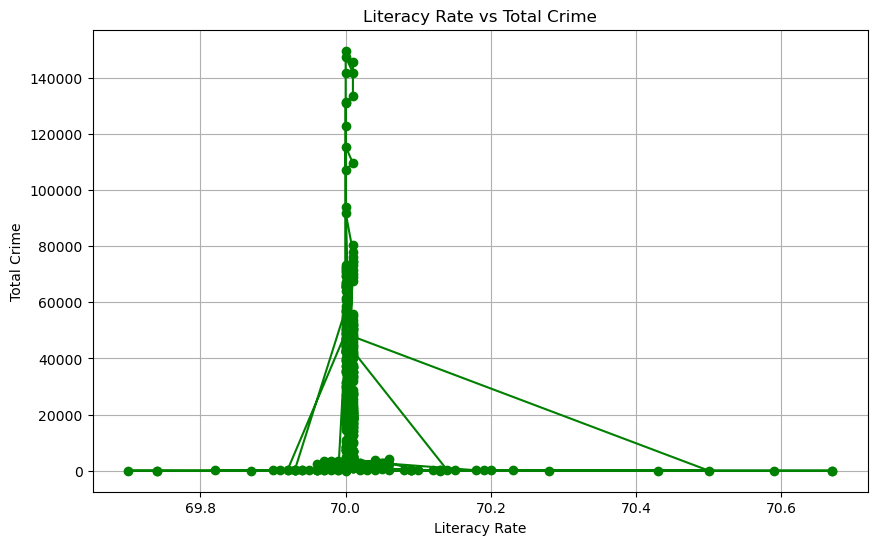

In [22]:
# Line plot
plt.figure(figsize=(10, 6))
plt.plot(df['LITERACY RATE'], df['TOTAL CRIME'], marker='o', linestyle='-', color='green')
plt.title('Literacy Rate vs Total Crime')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crime')
plt.grid(True)
plt.show()


* In this graph representation, the maximum literacy rate is depicted as 70%. Based on assumptions, we initially consider that 70% of the total population is literate. This assumption is derived from the National Statistical Commission's surveyed literacy rate, which has averaged 70% over the last three decades. Although the literacy rate is observed to be increasing, precise statistical data is currently unavailable. Therefore, we proceed with the assumption that the literacy rate is at 70%.

## Phase 2

### 2.2

* #### Analysis of the type of crime vs each state vs Literacy rate.





In [23]:
features = ['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE']

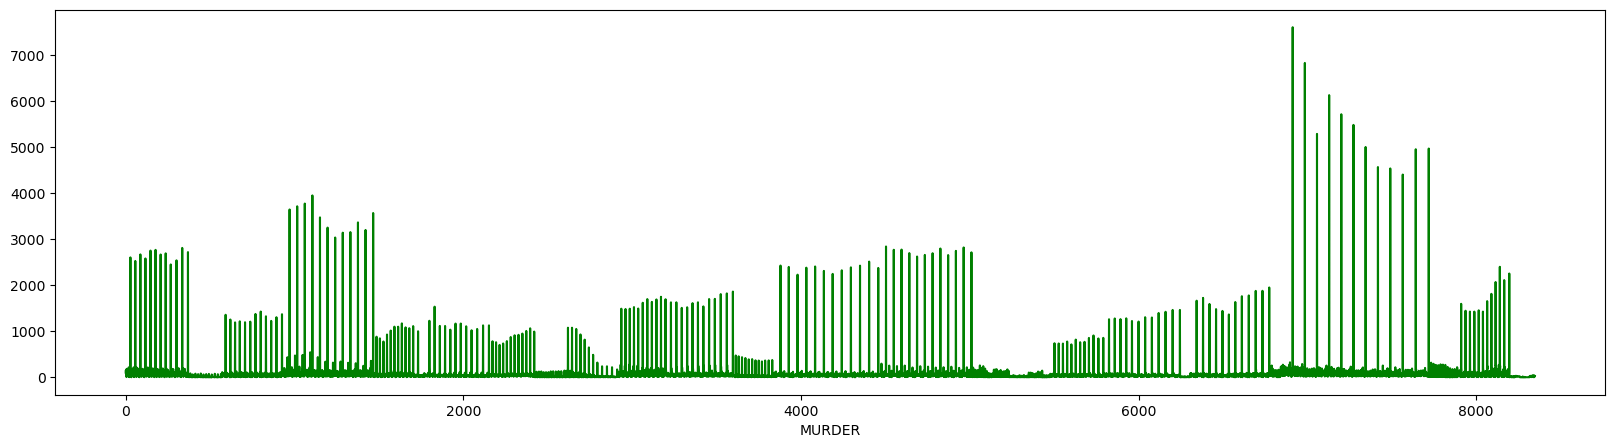

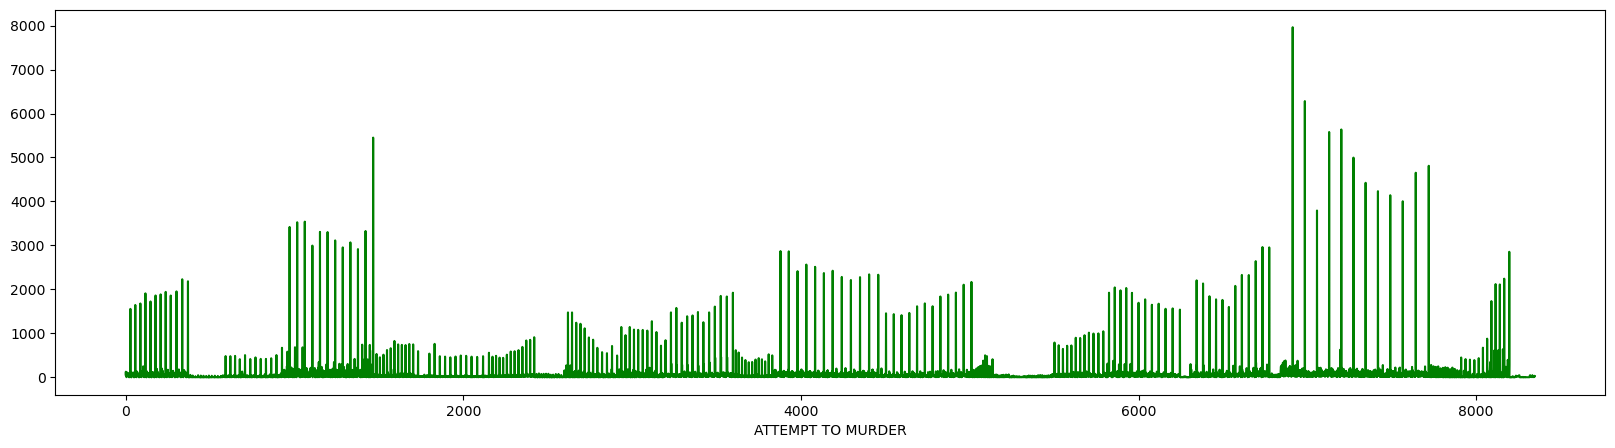

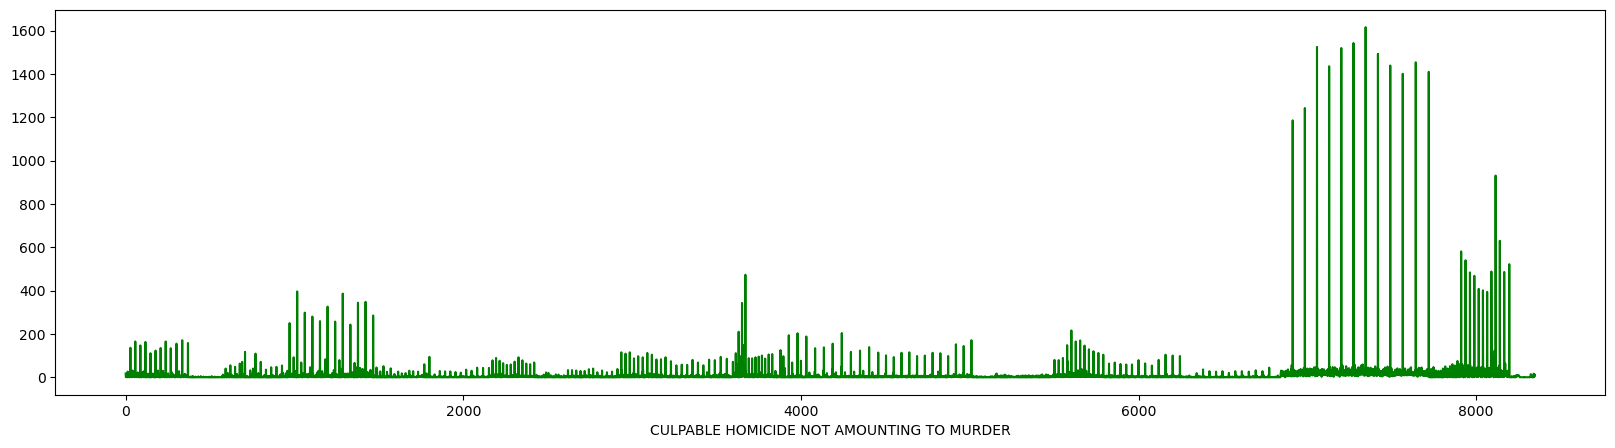

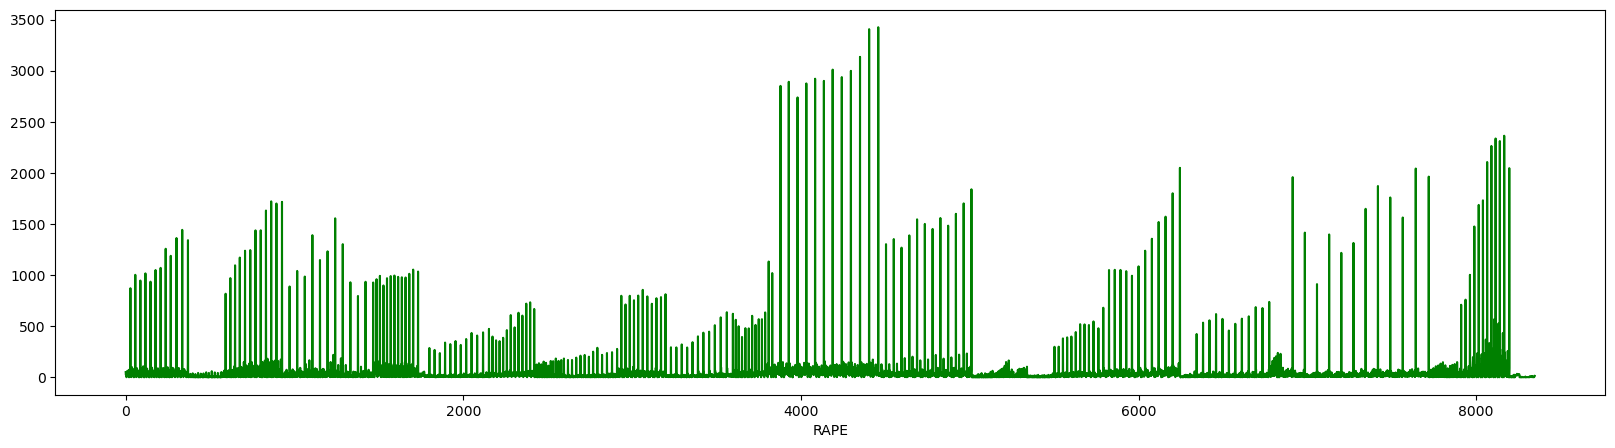

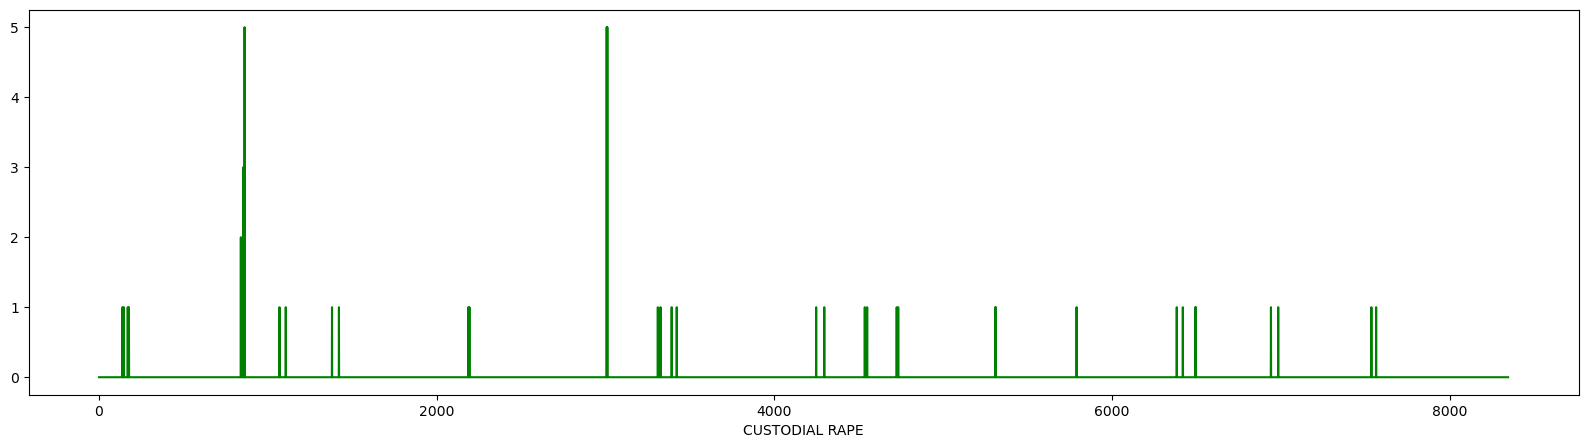

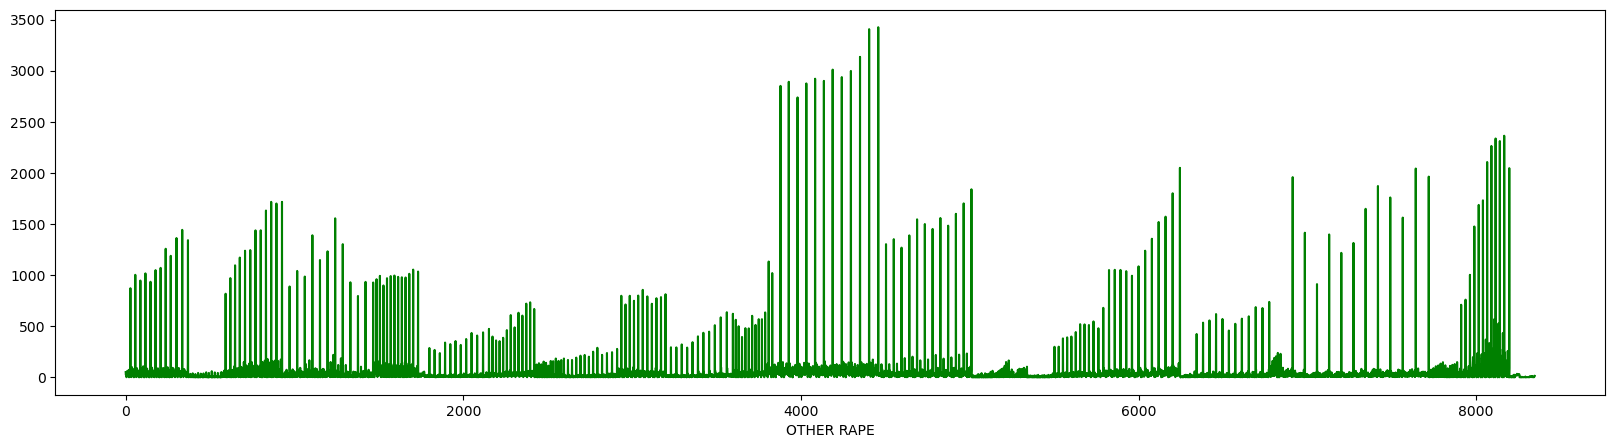

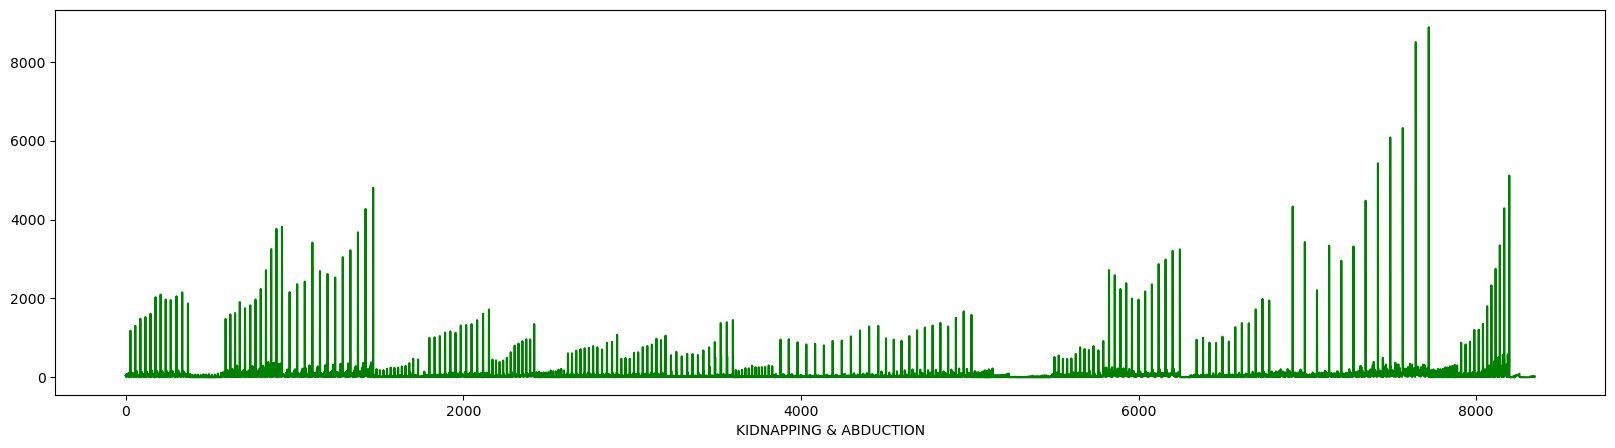

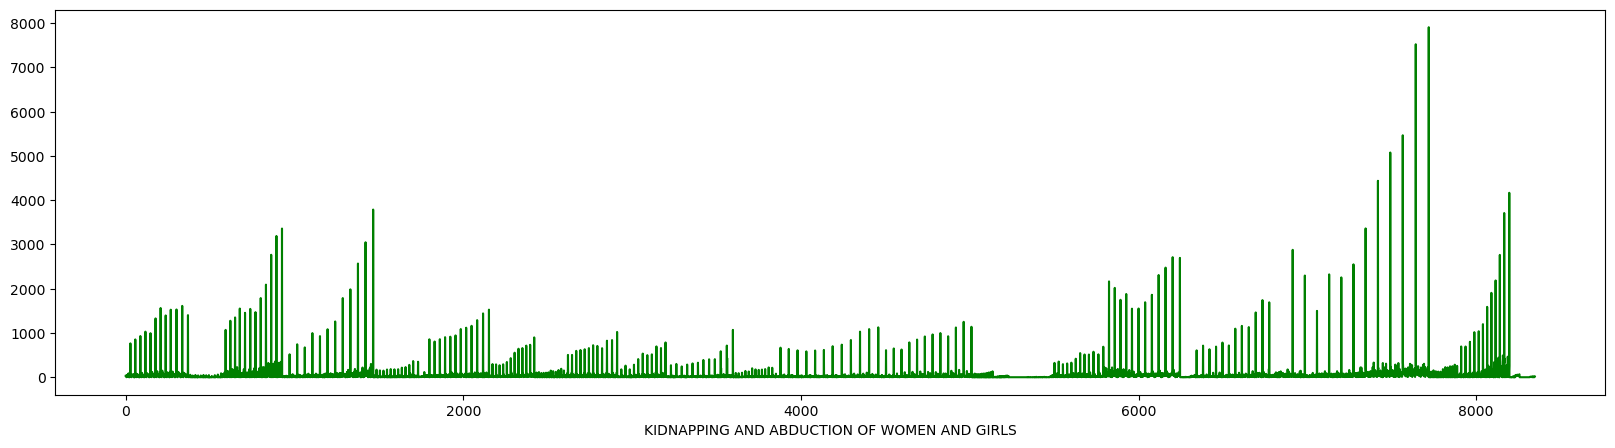

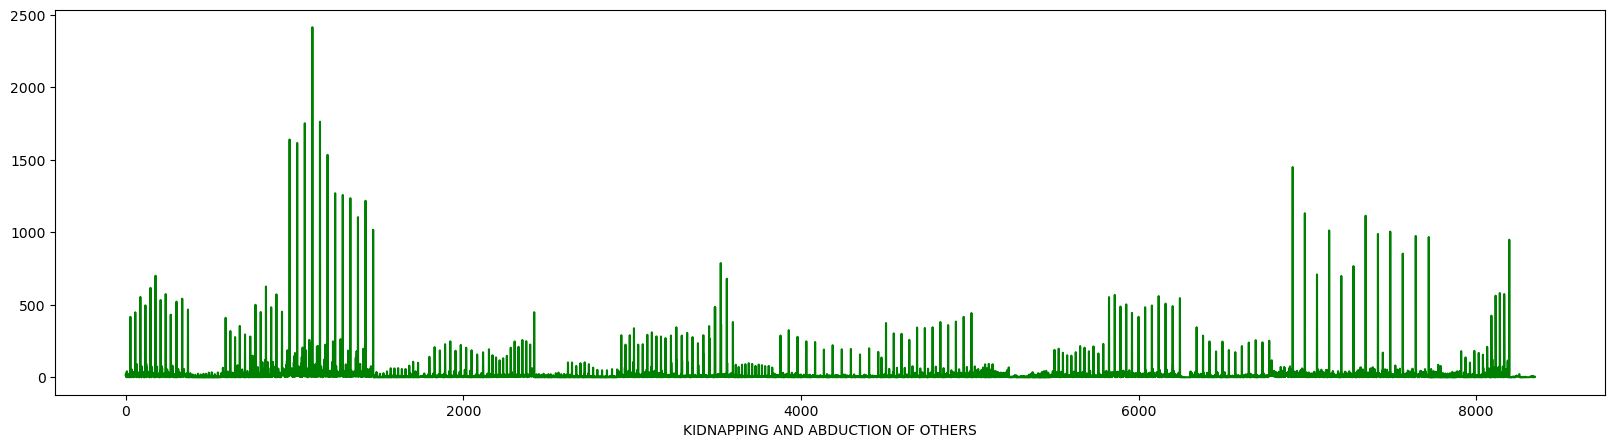

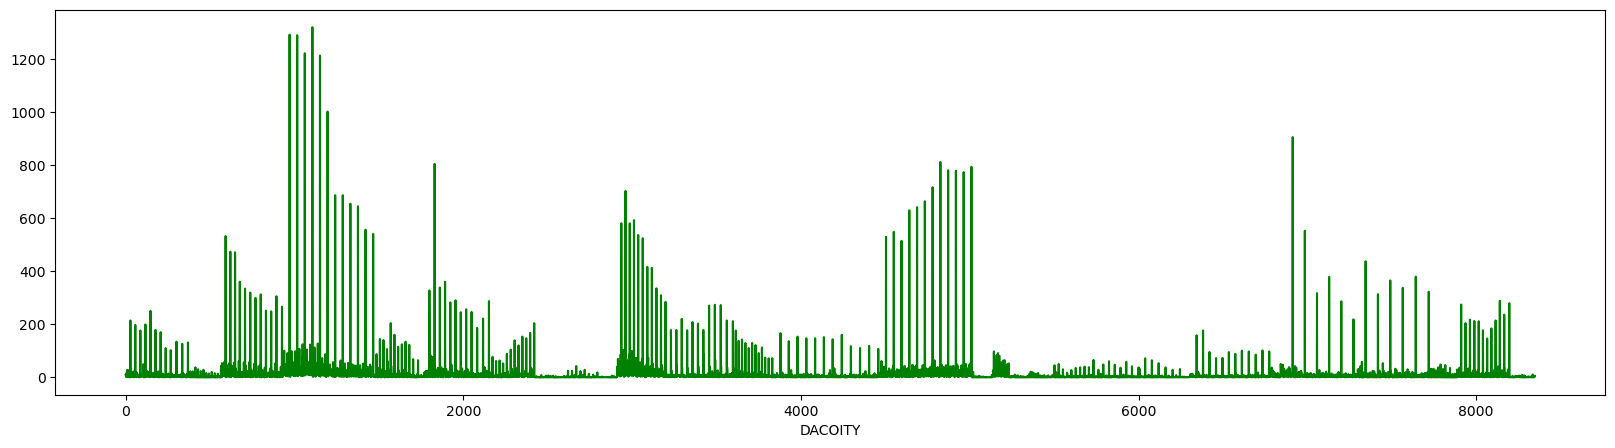

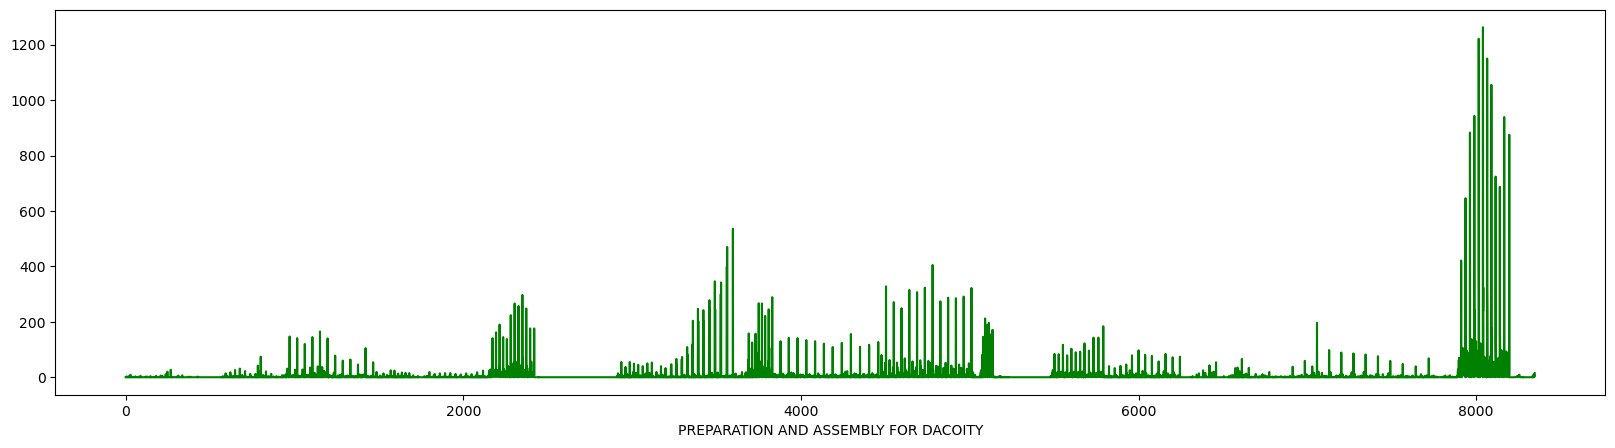

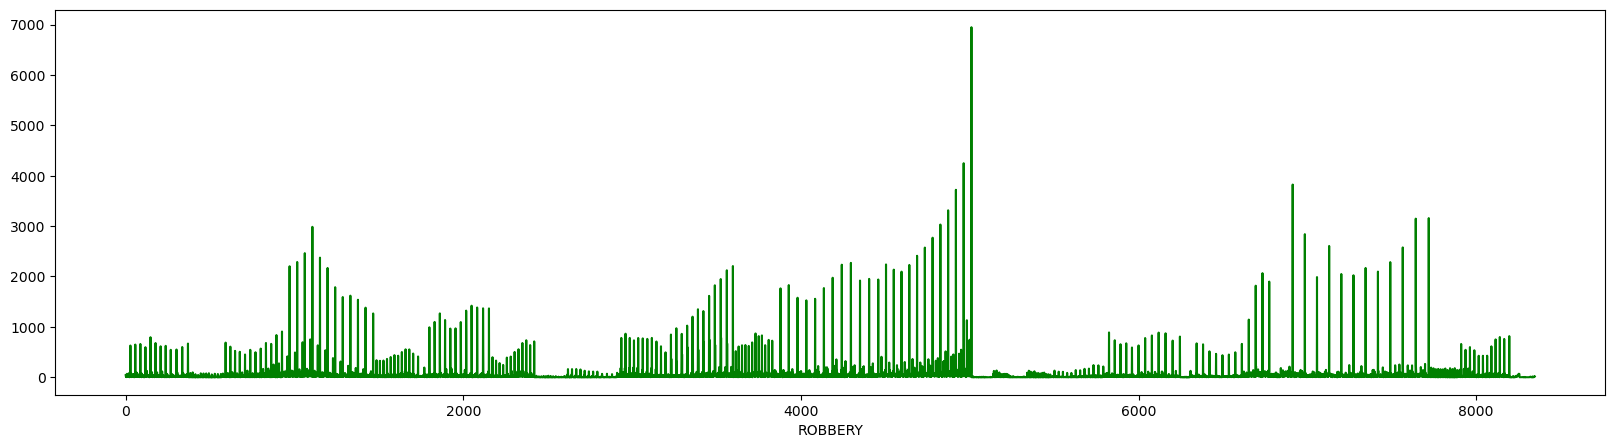

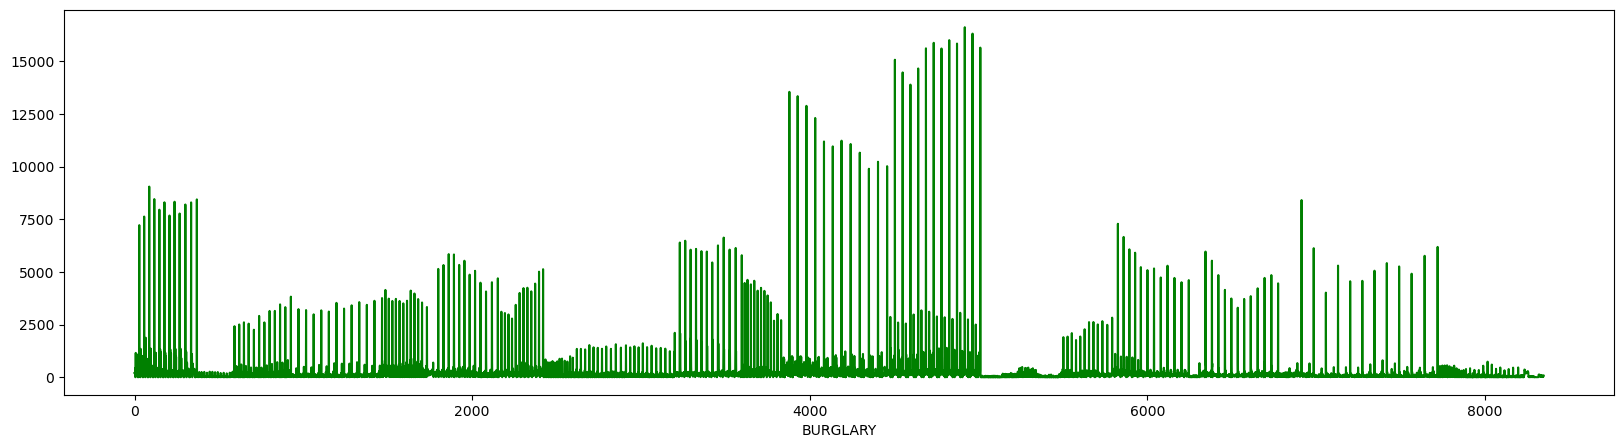

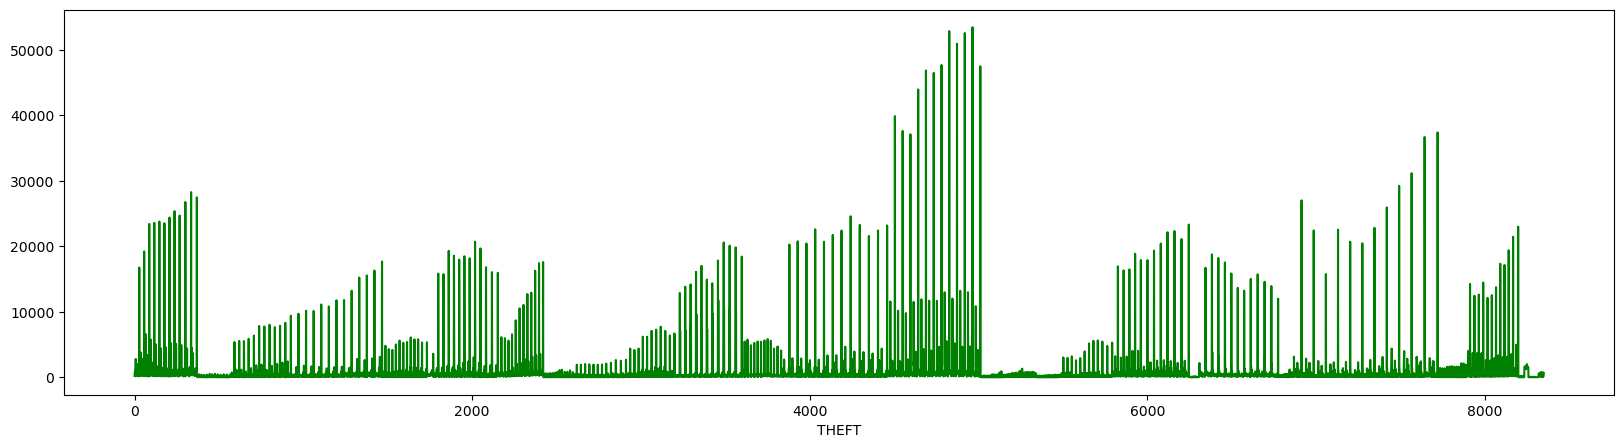

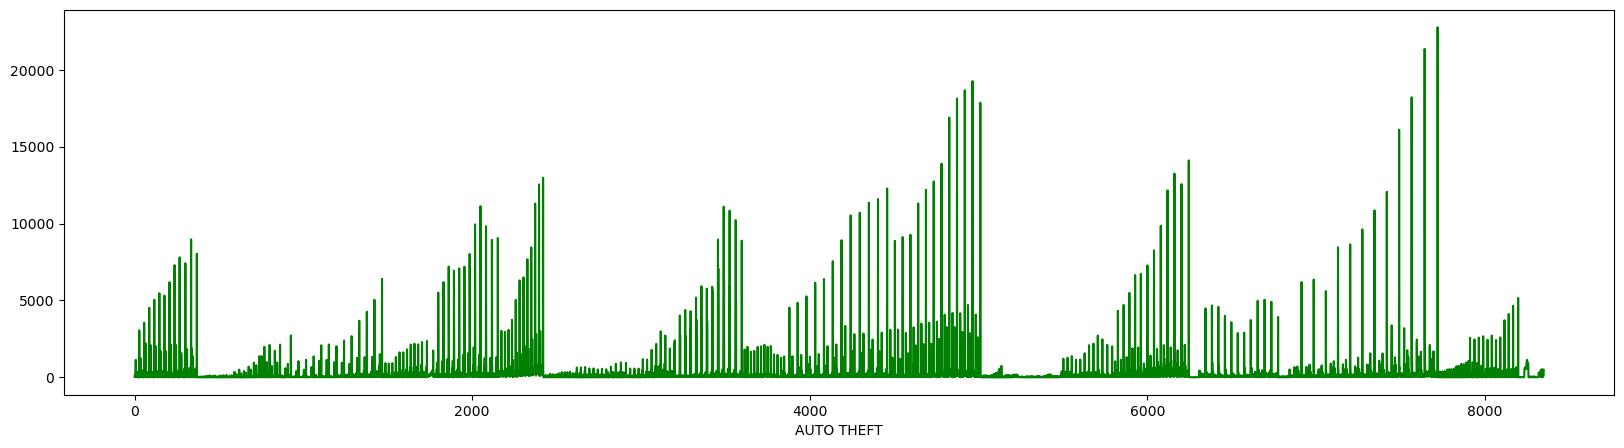

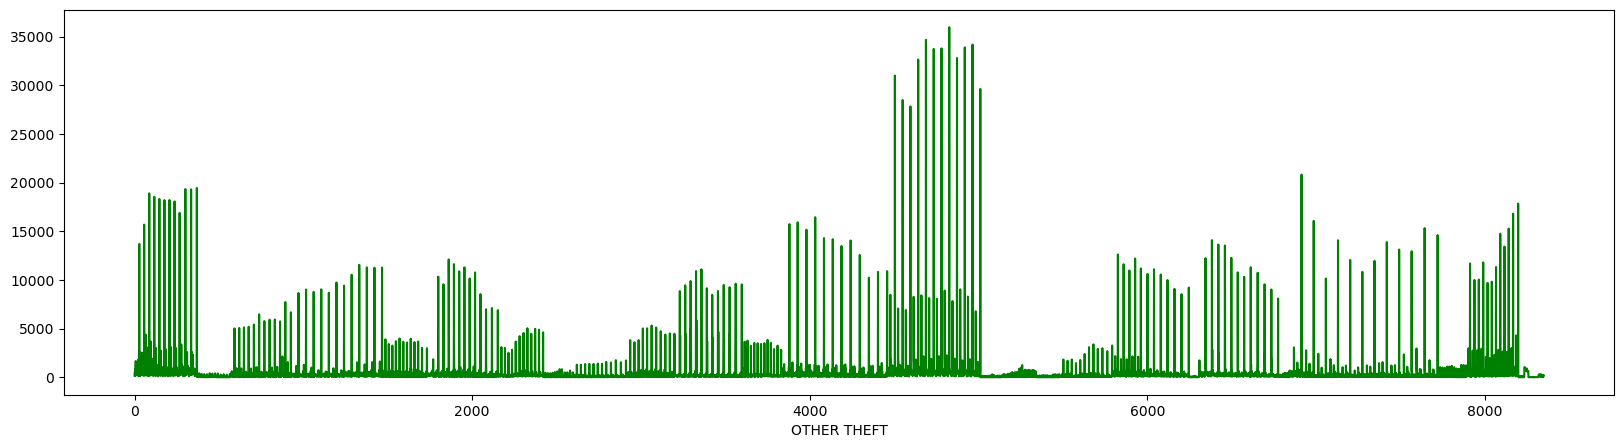

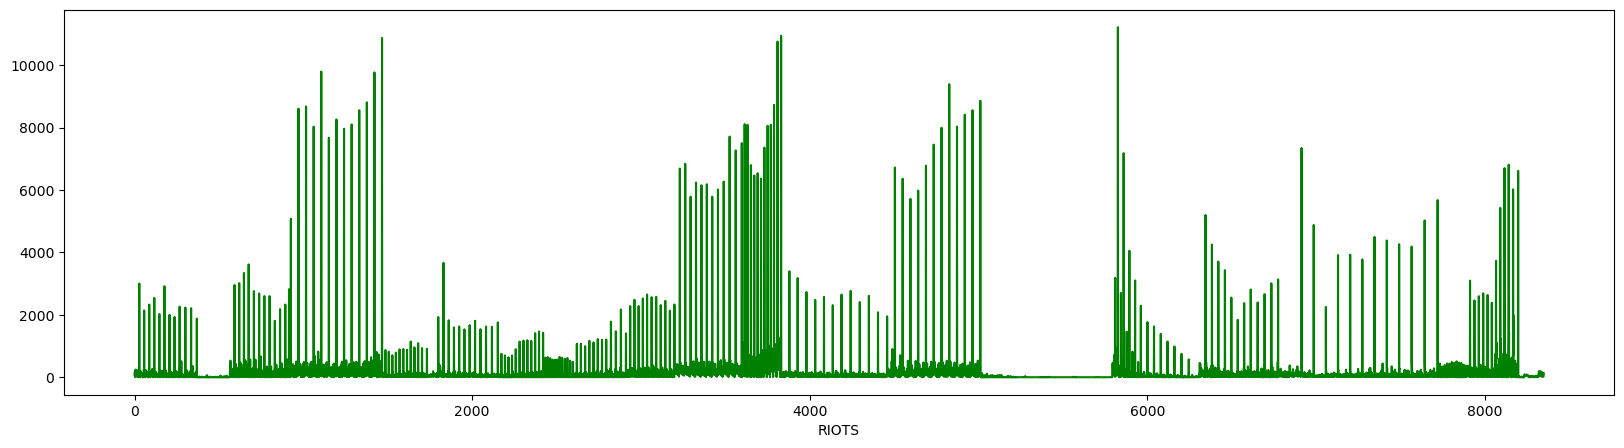

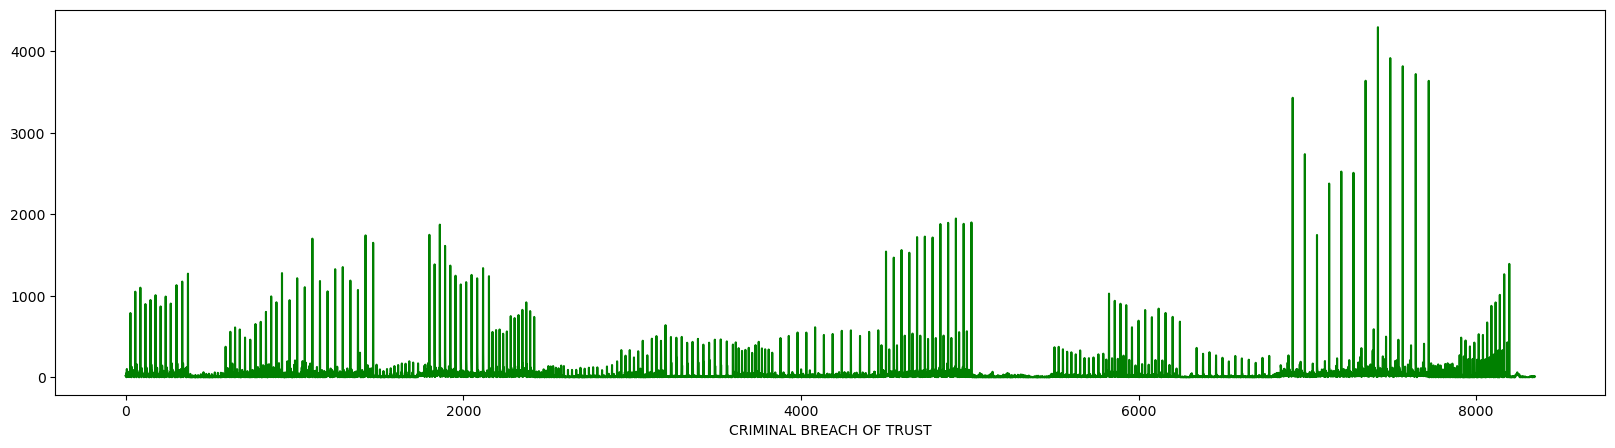

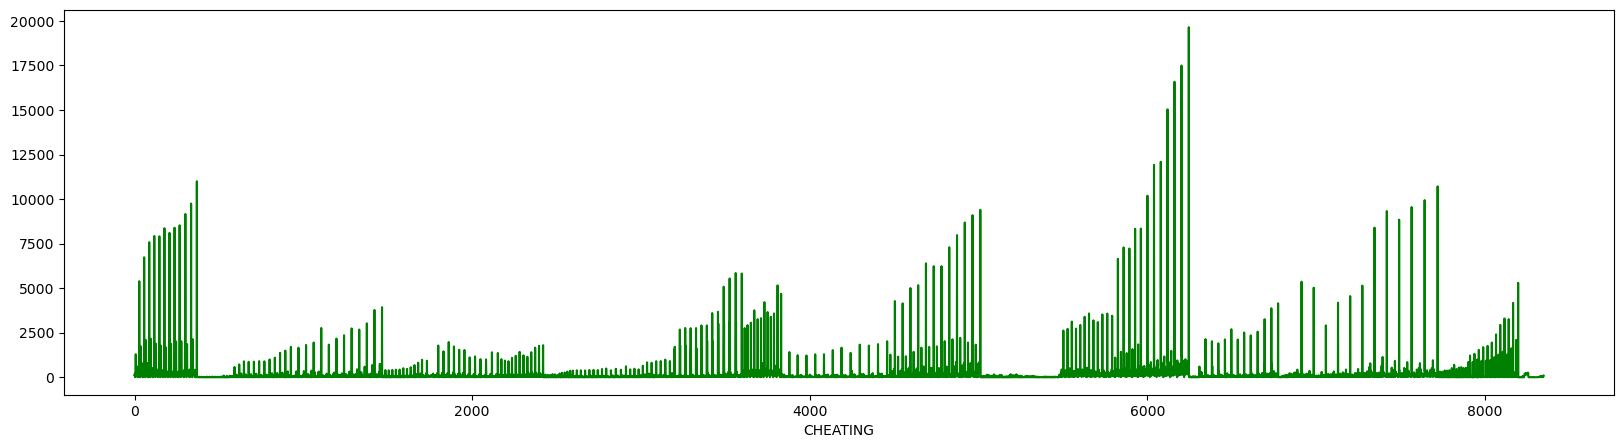

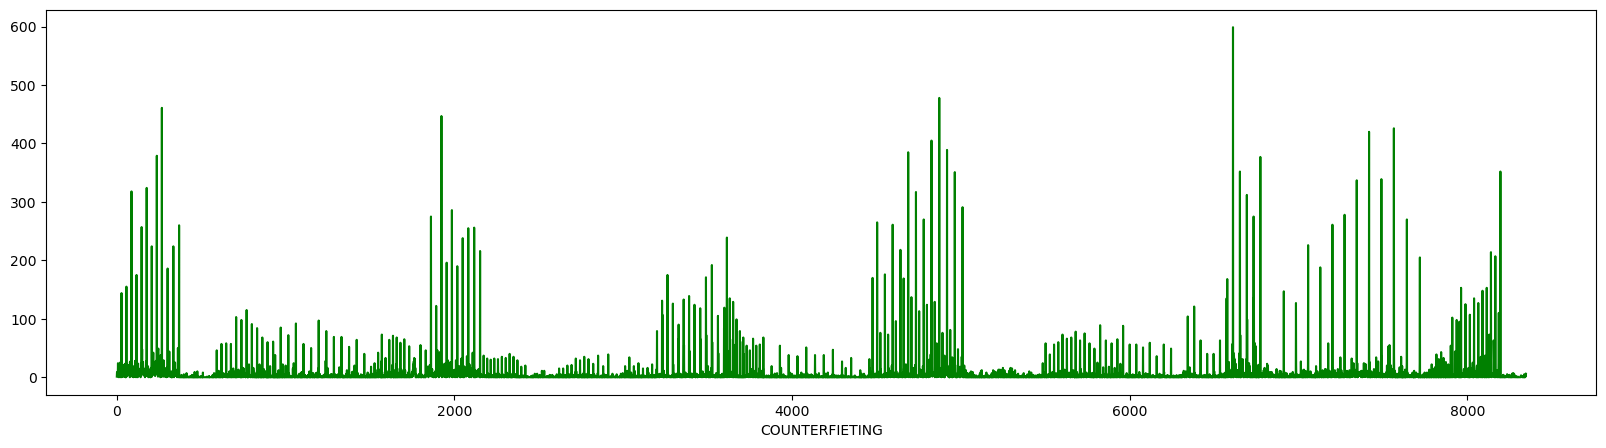

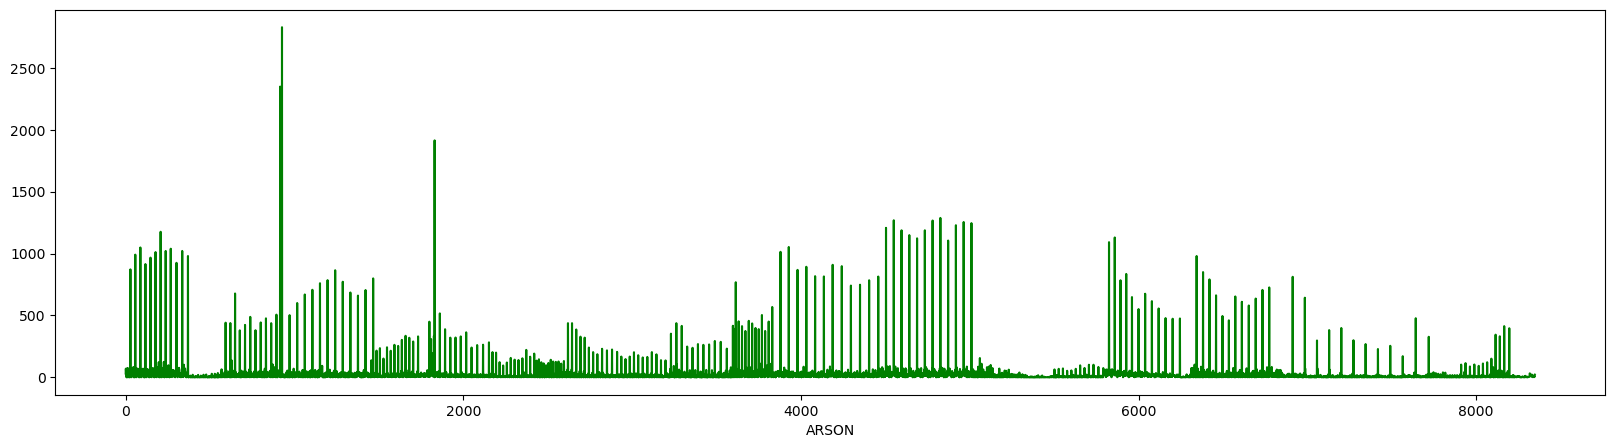

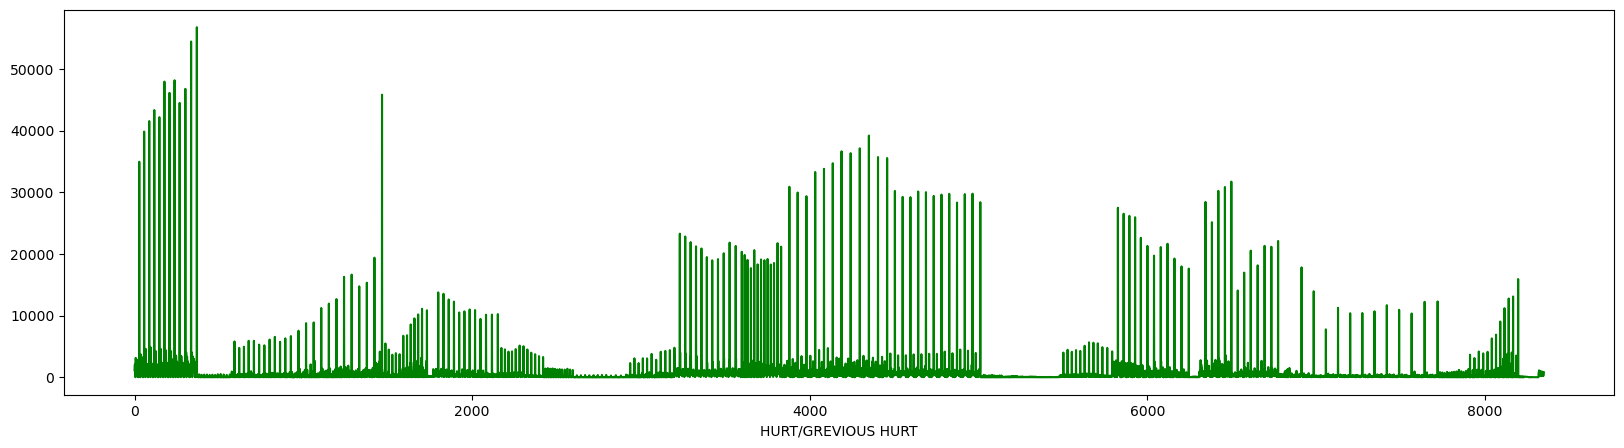

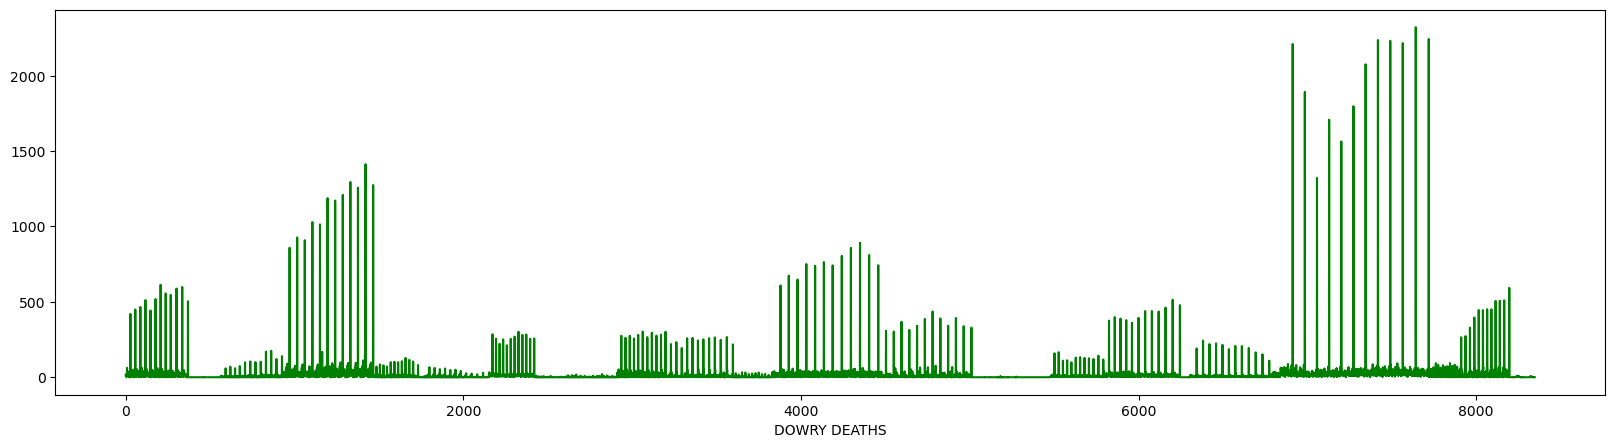

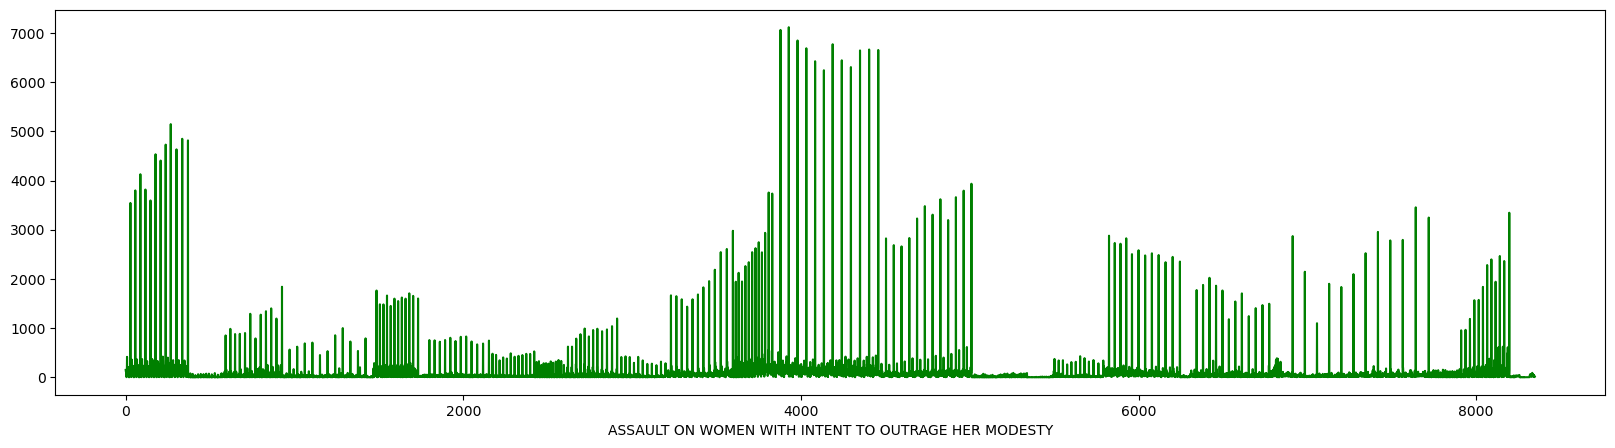

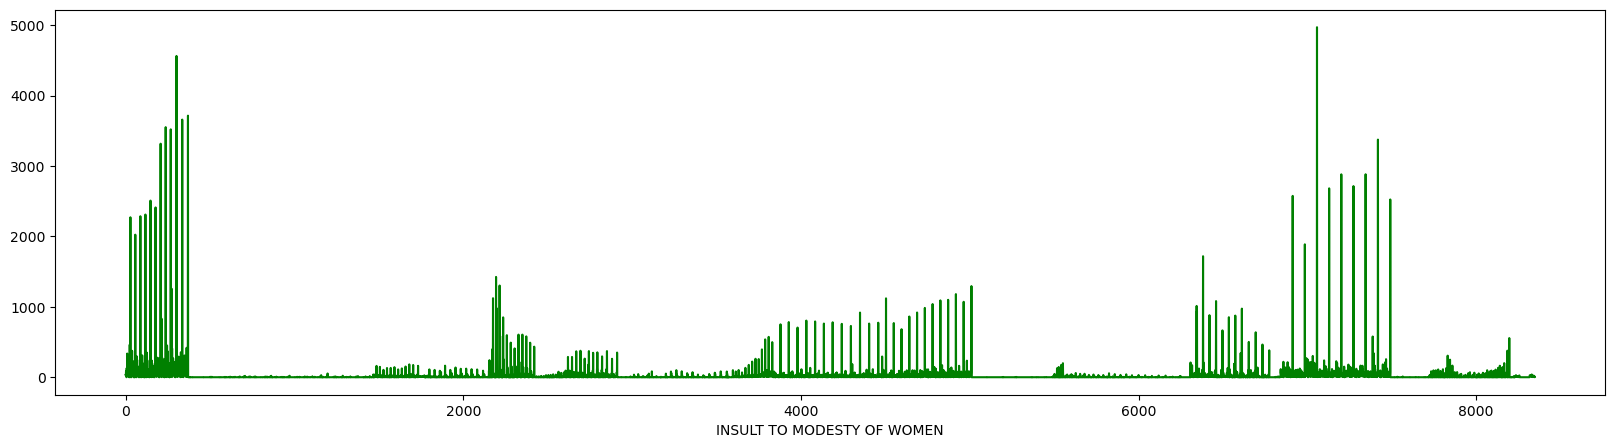

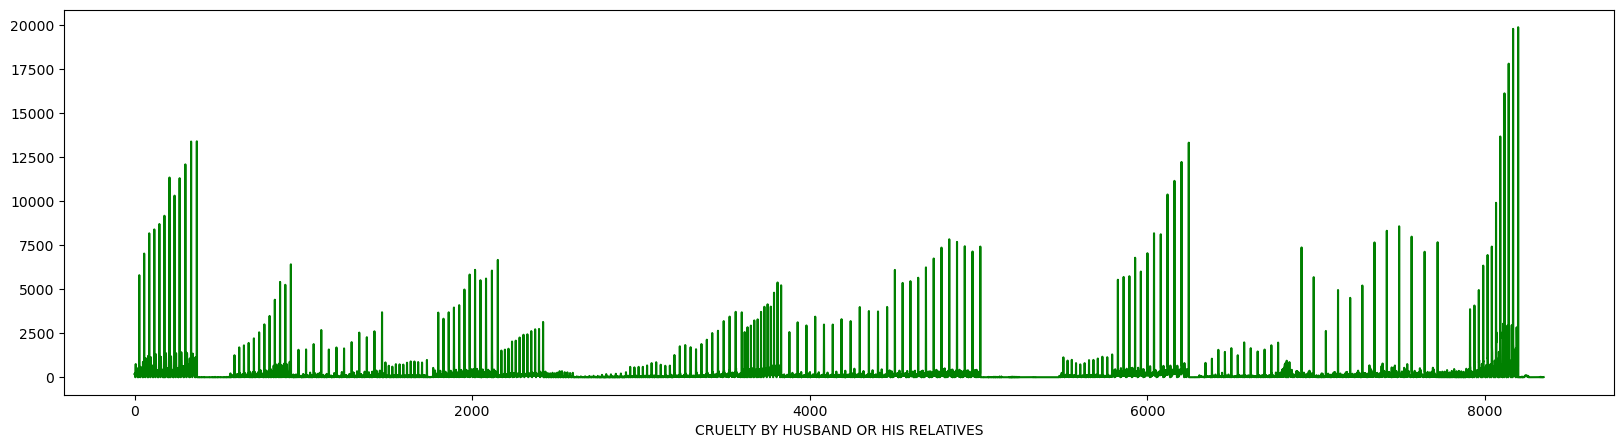

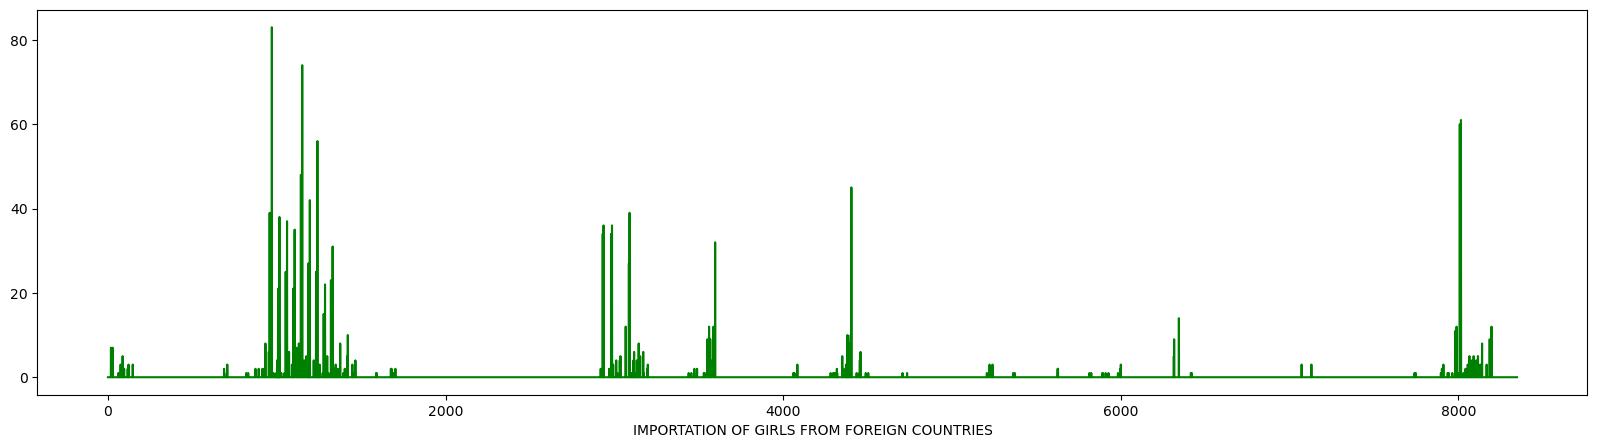

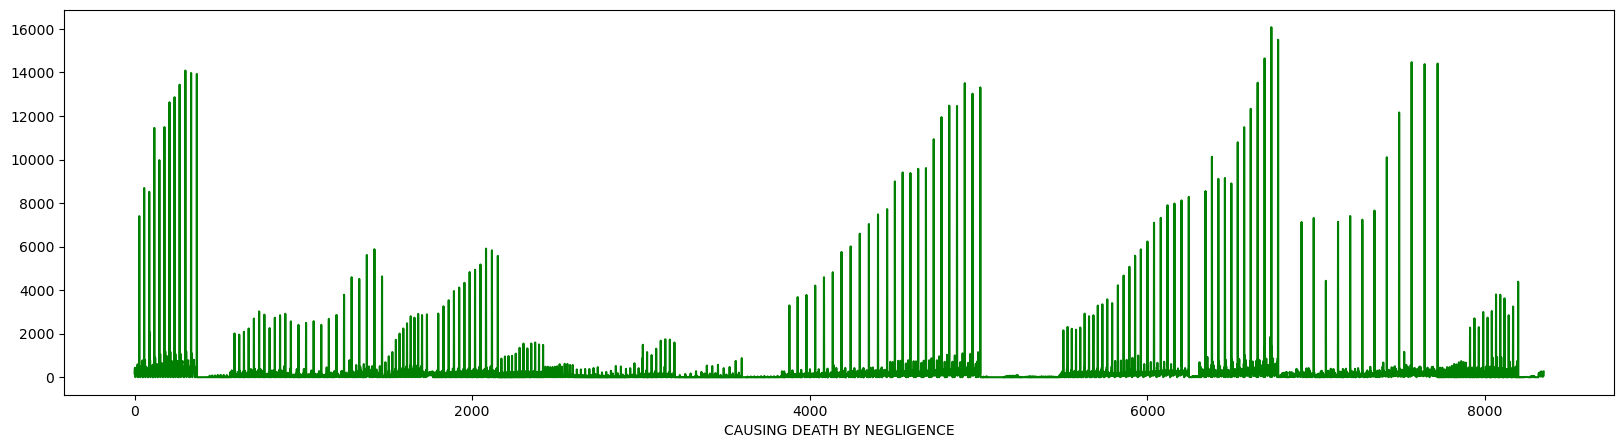

In [24]:
for feature in features:
    plt.figure(figsize=(20,5))
    plt.plot(merged_df[feature],color='green')
    plt.xlabel(feature)
   
    plt.show()

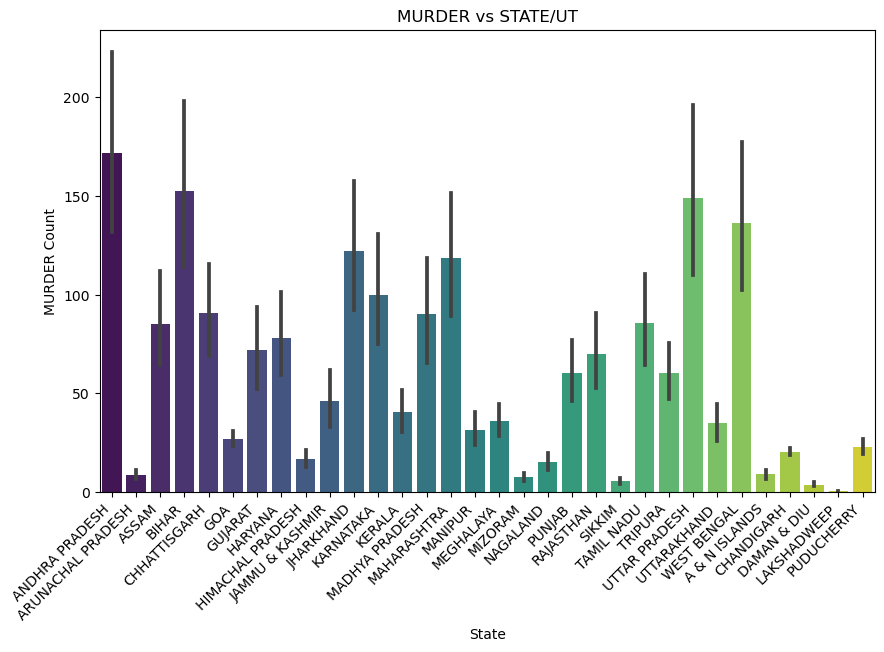

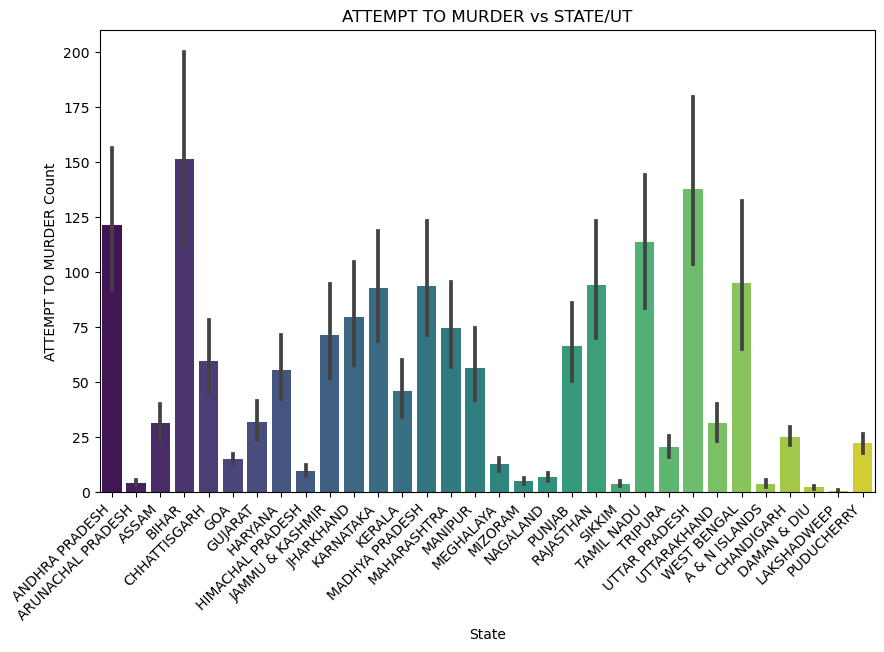

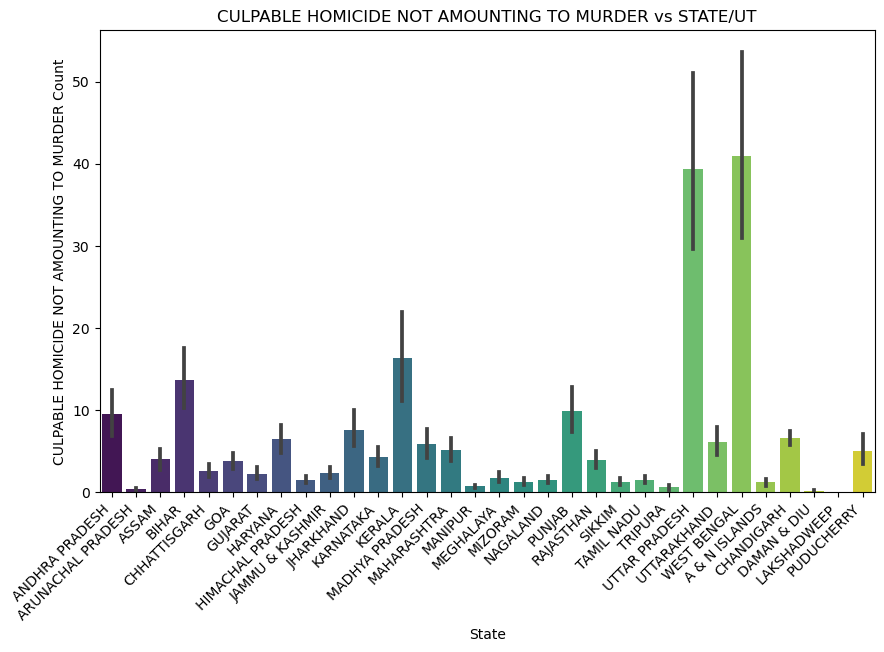

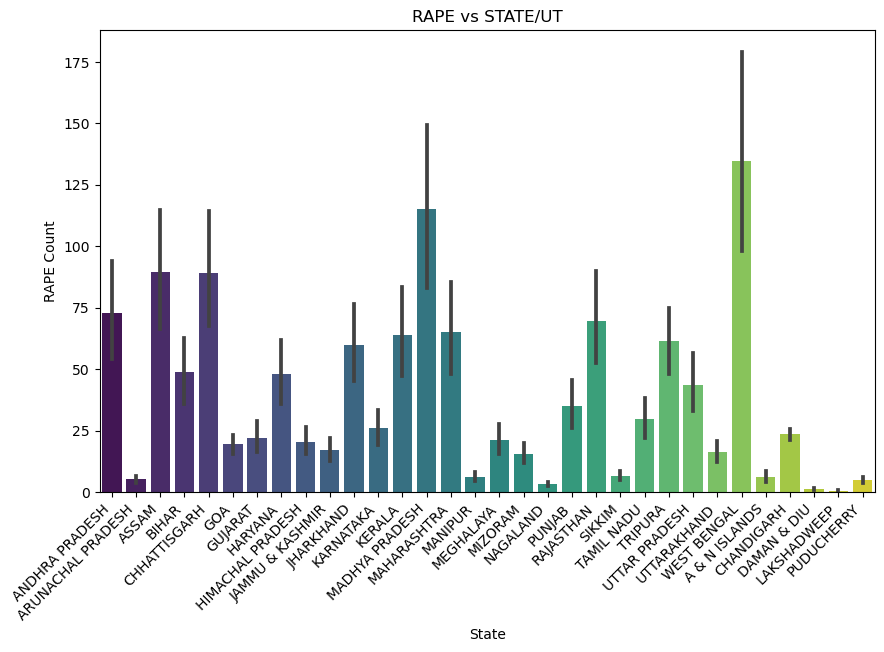

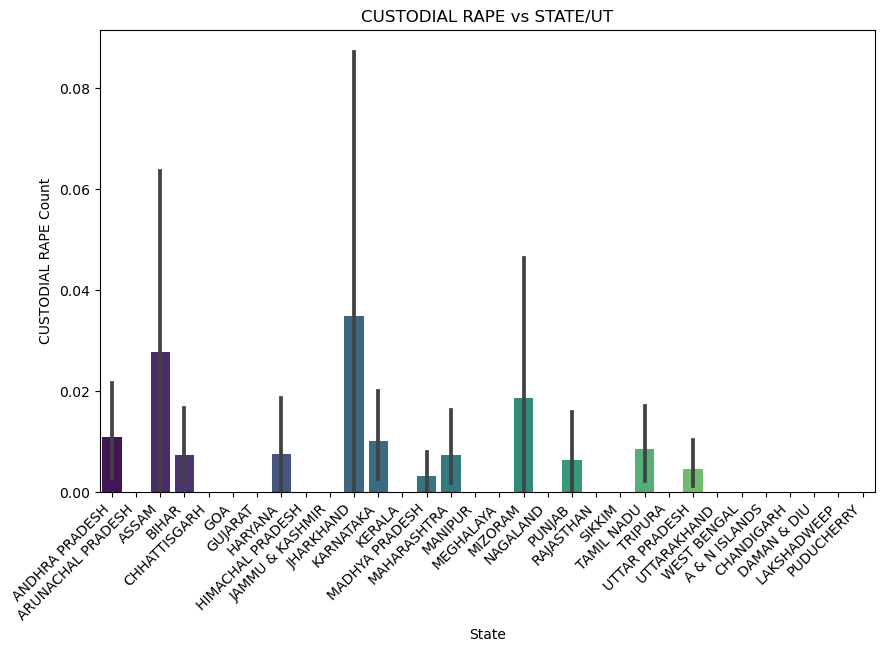

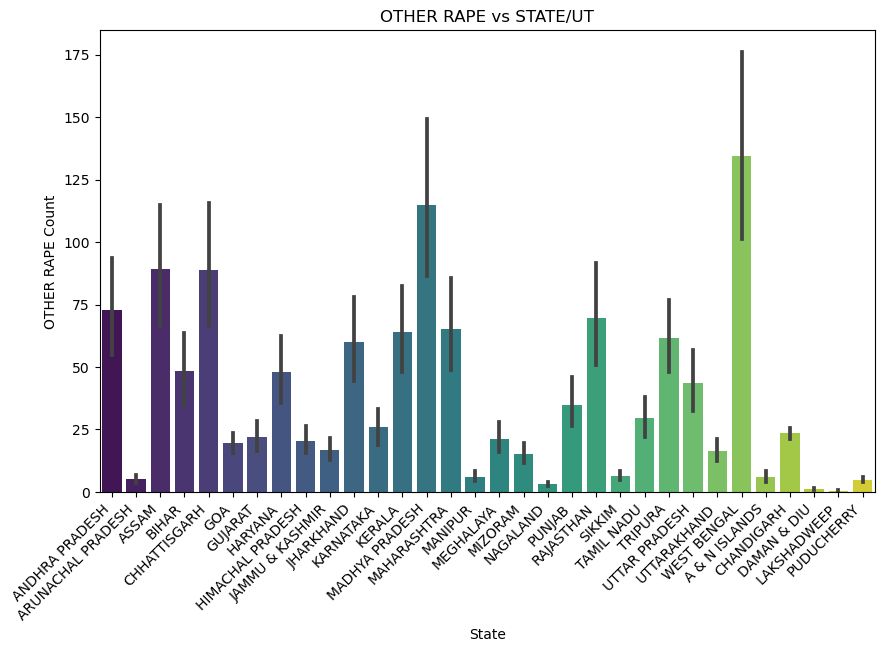

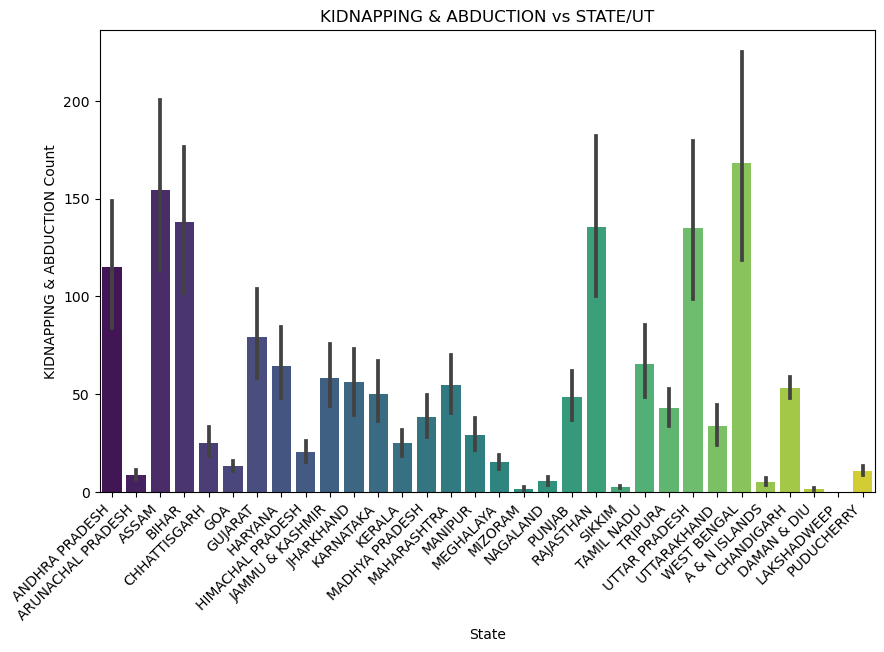

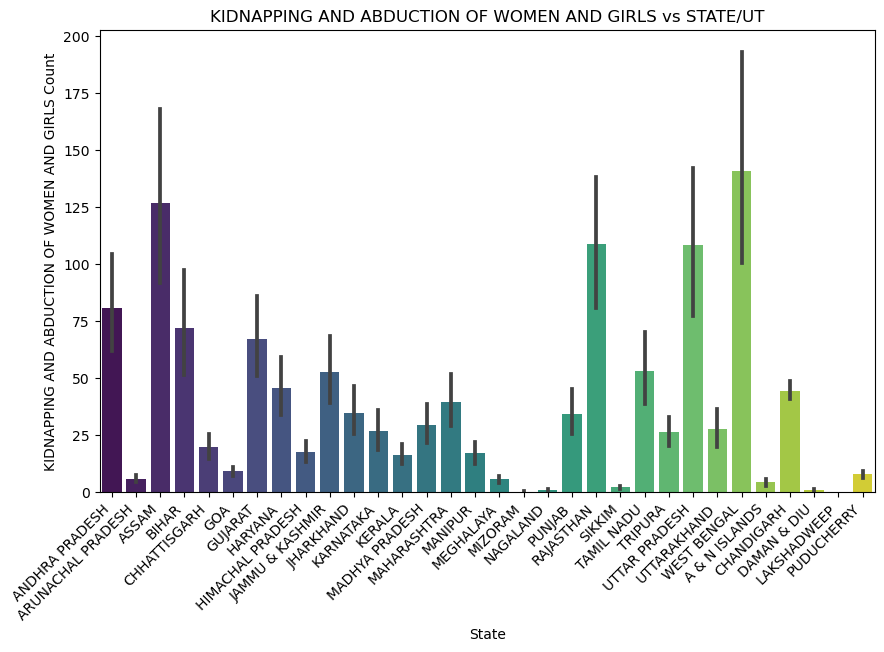

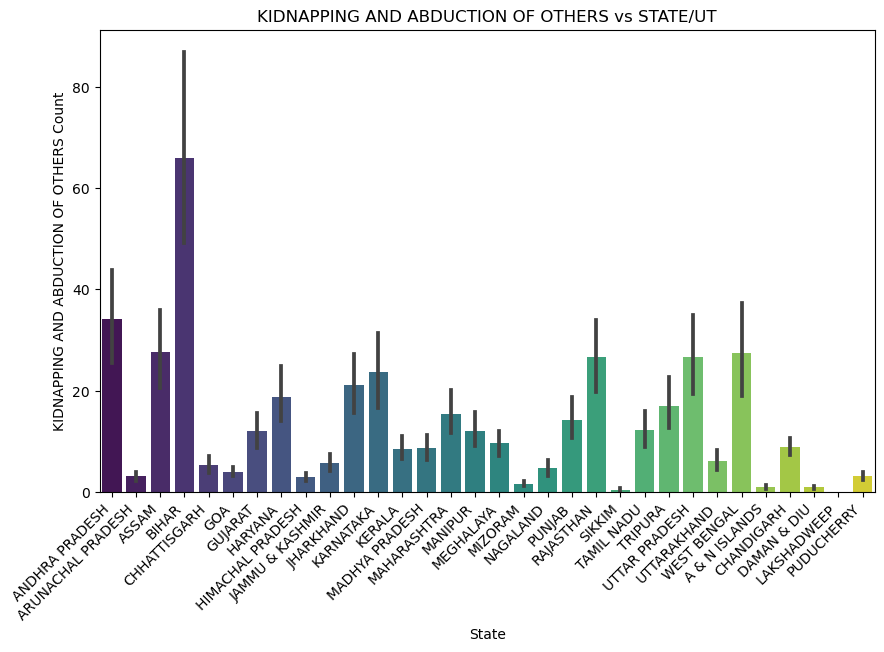

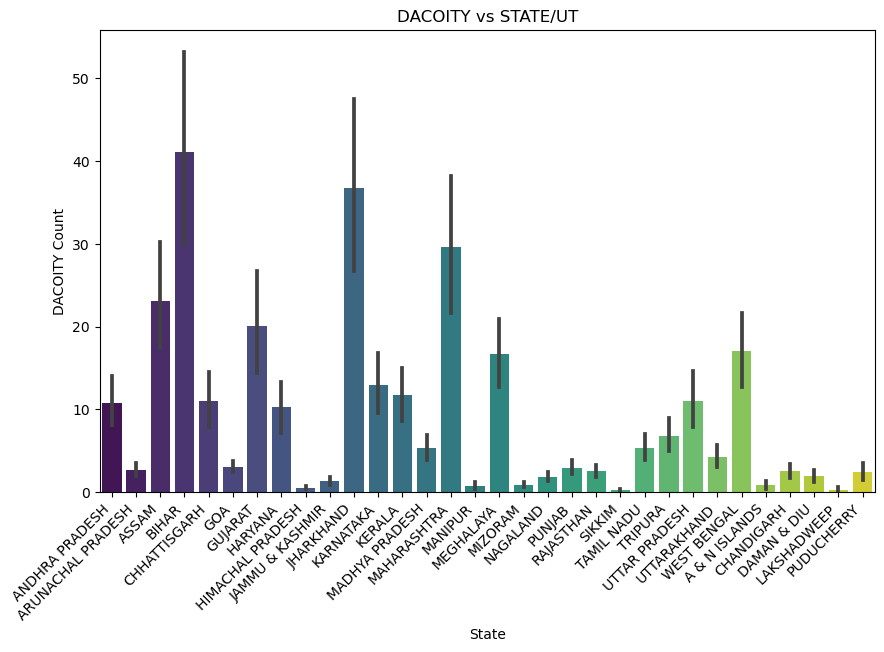

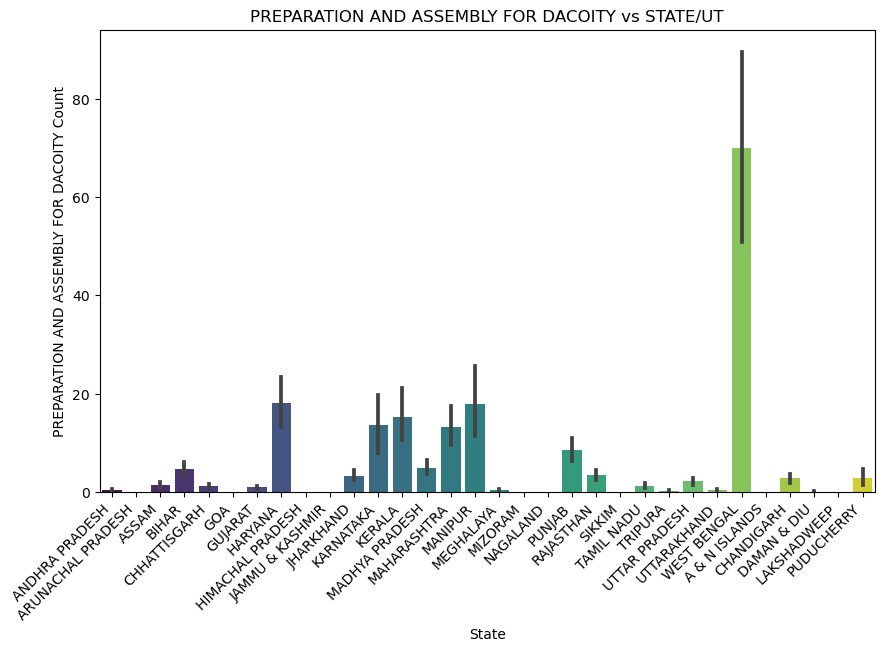

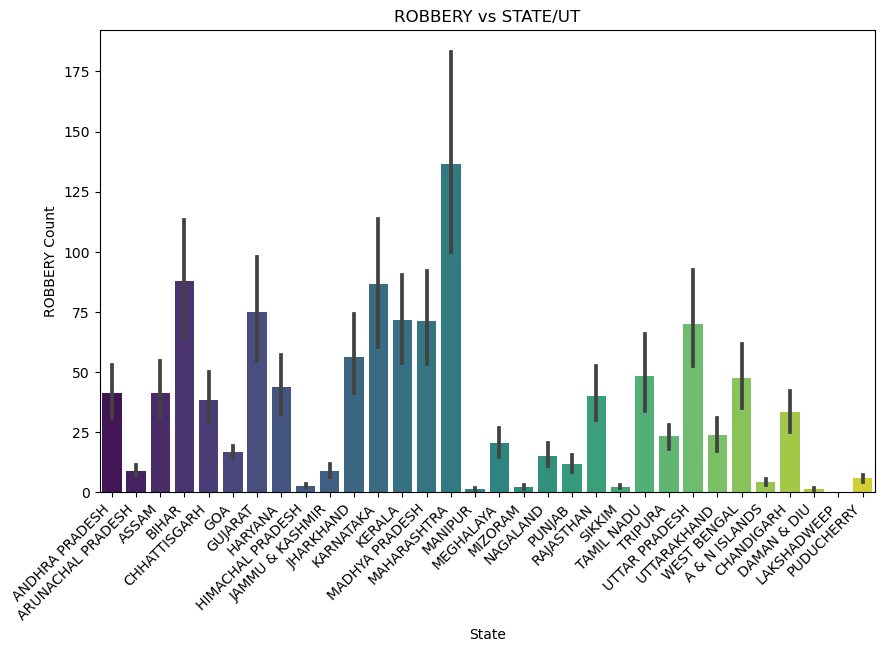

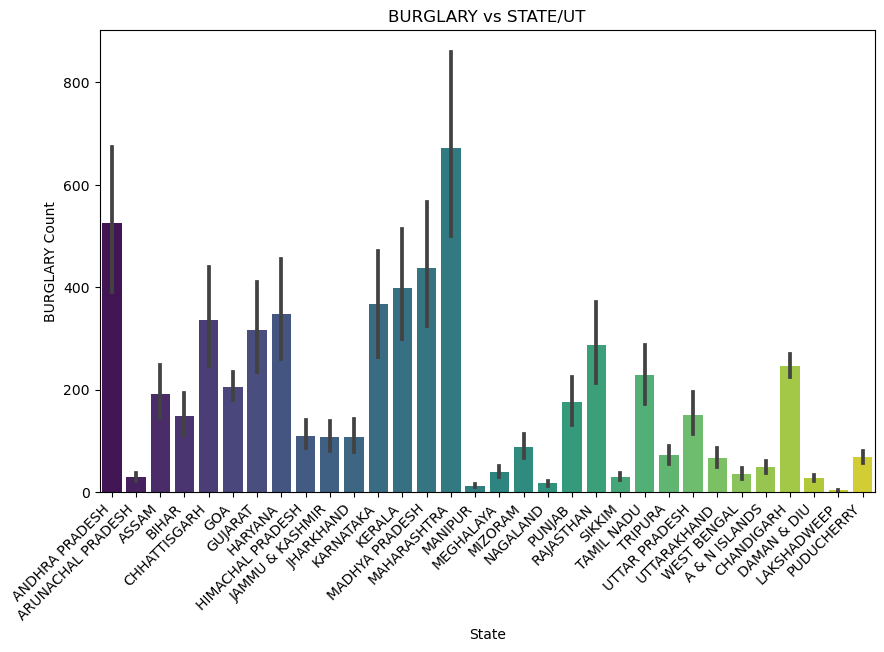

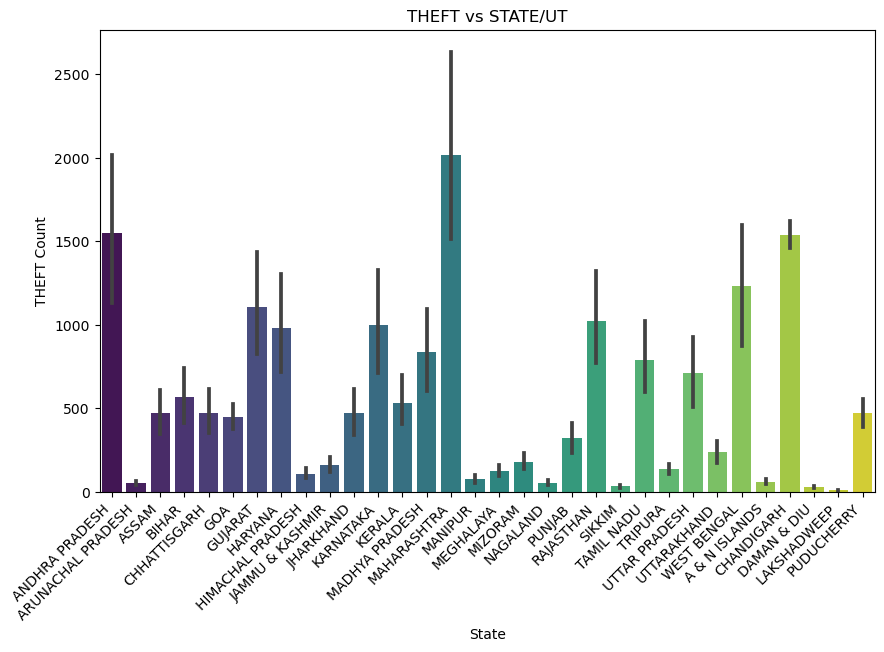

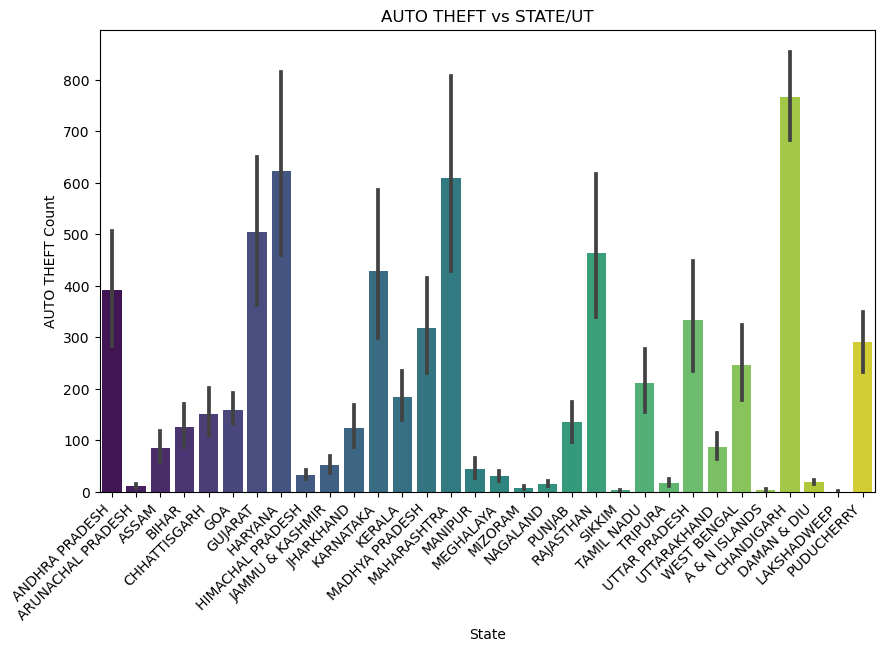

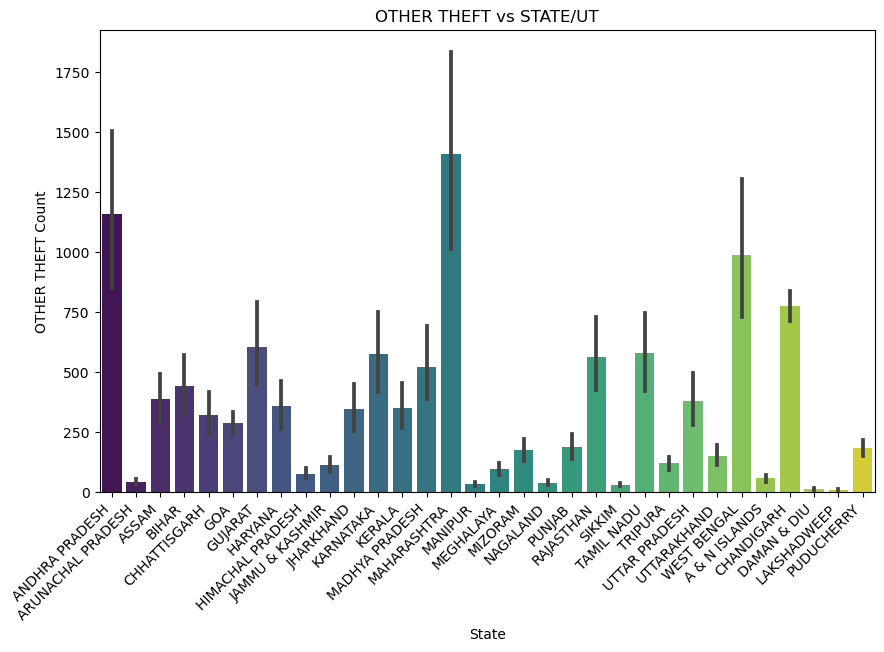

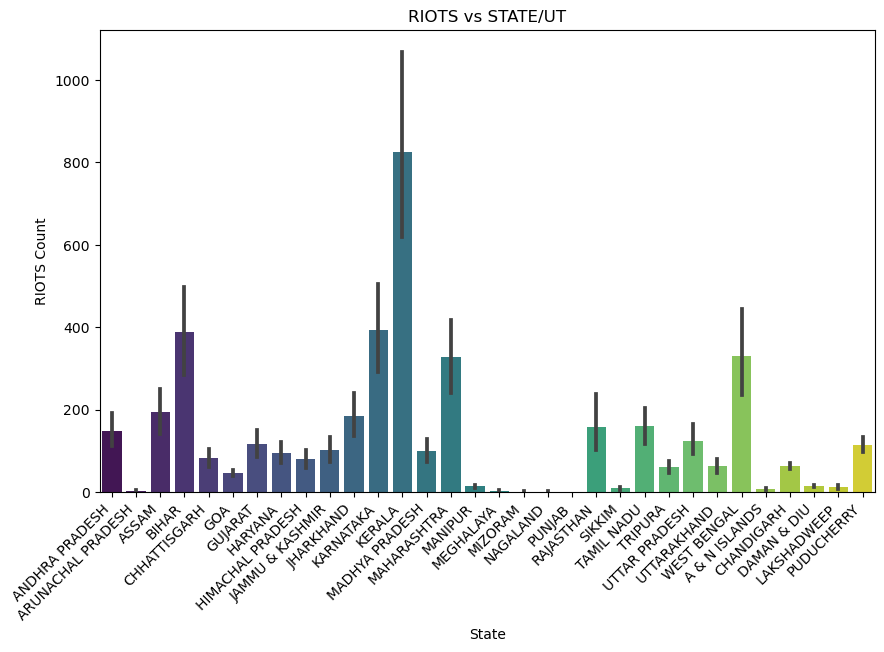

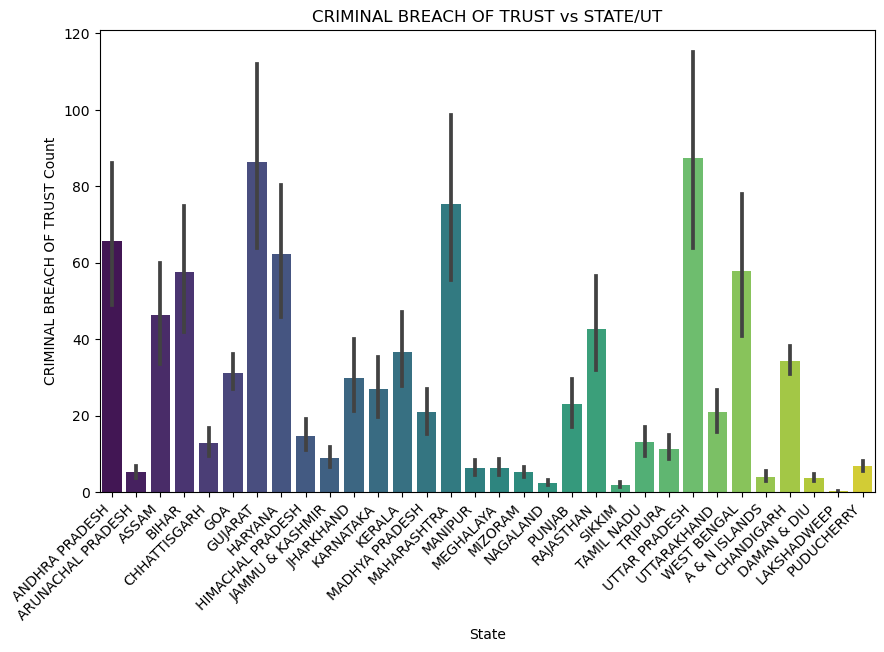

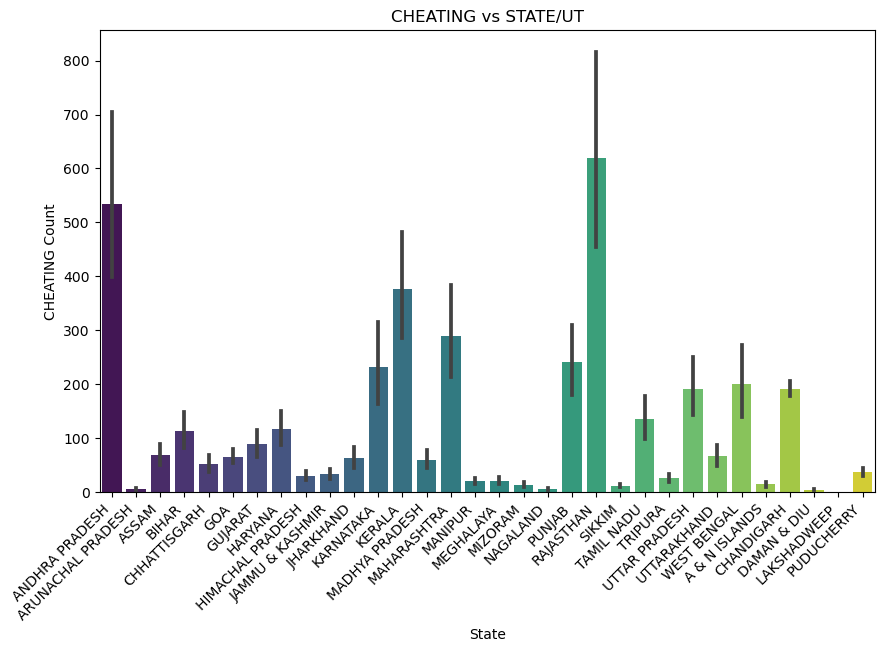

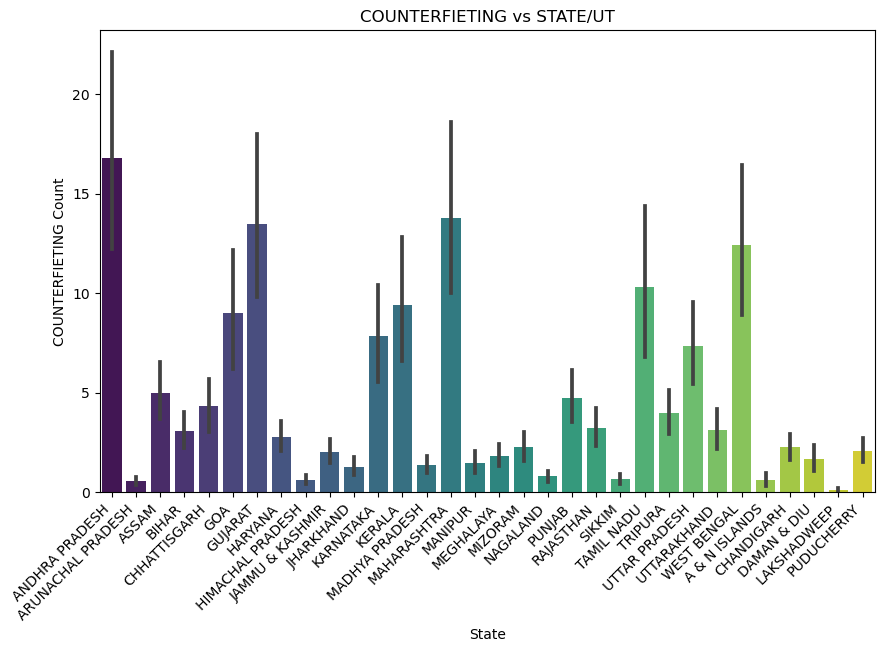

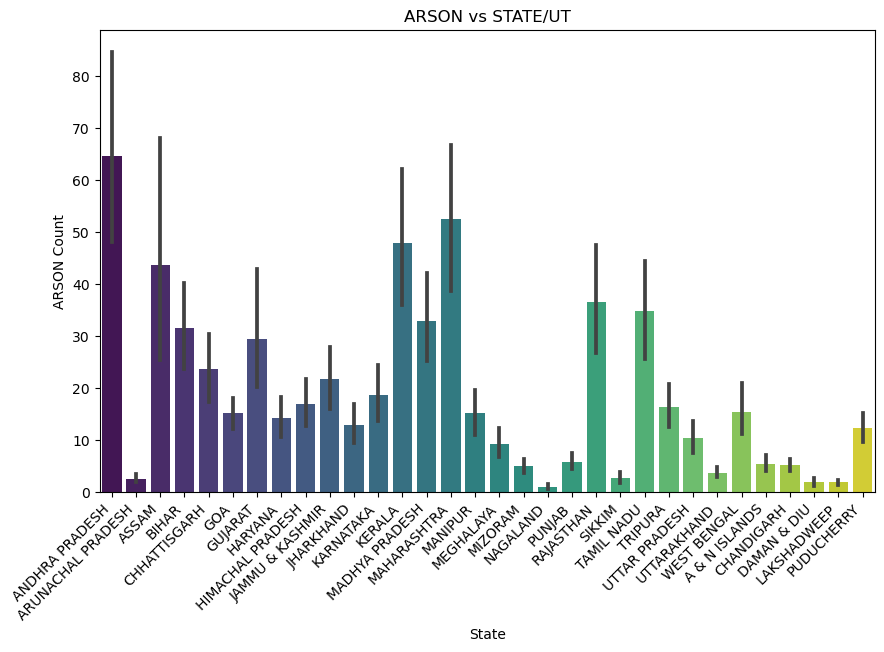

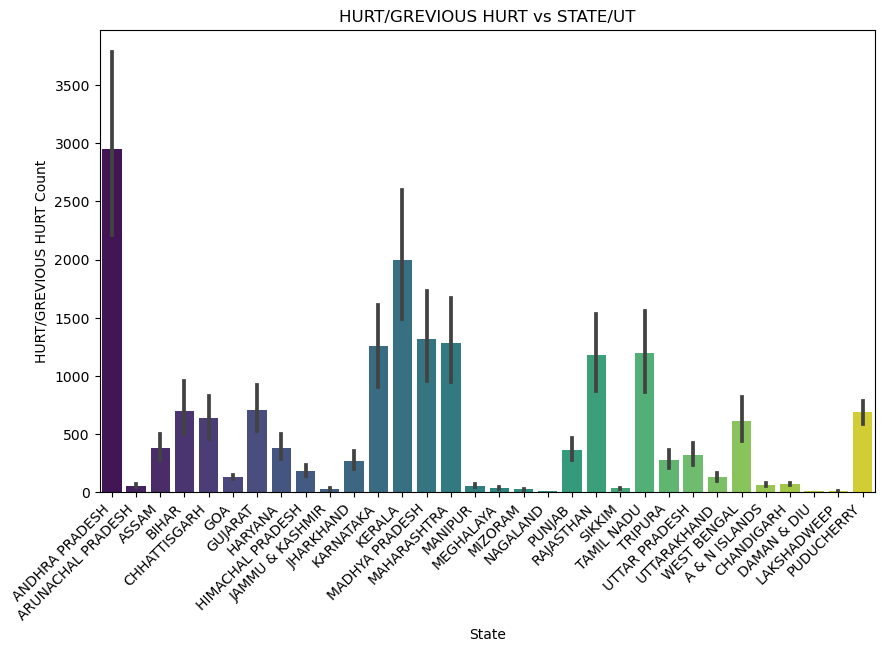

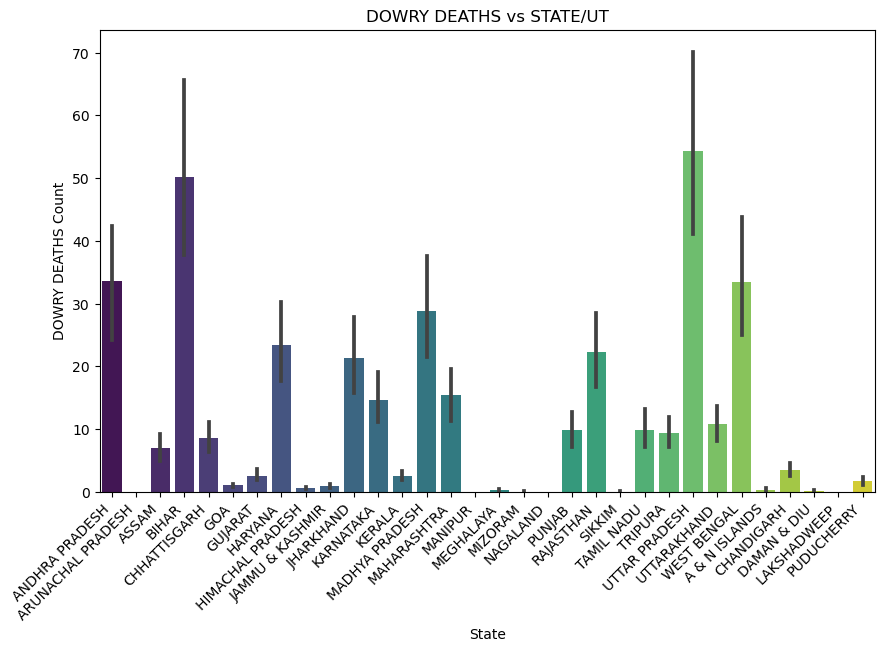

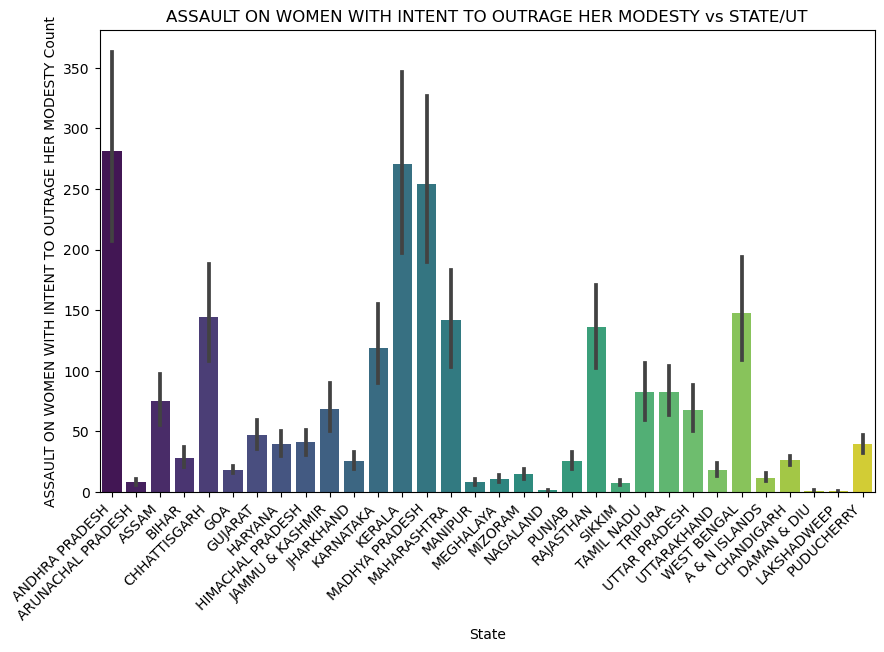

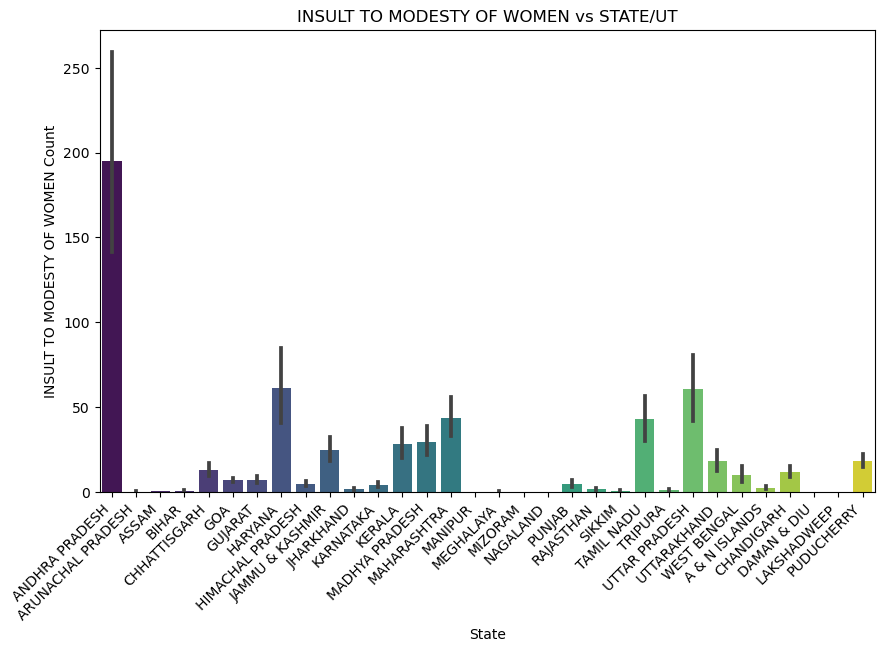

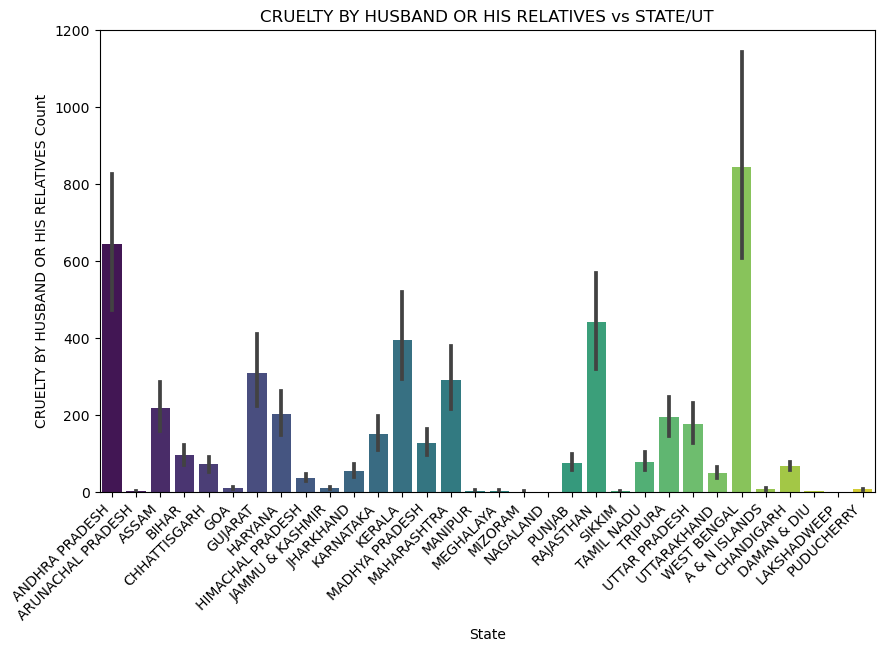

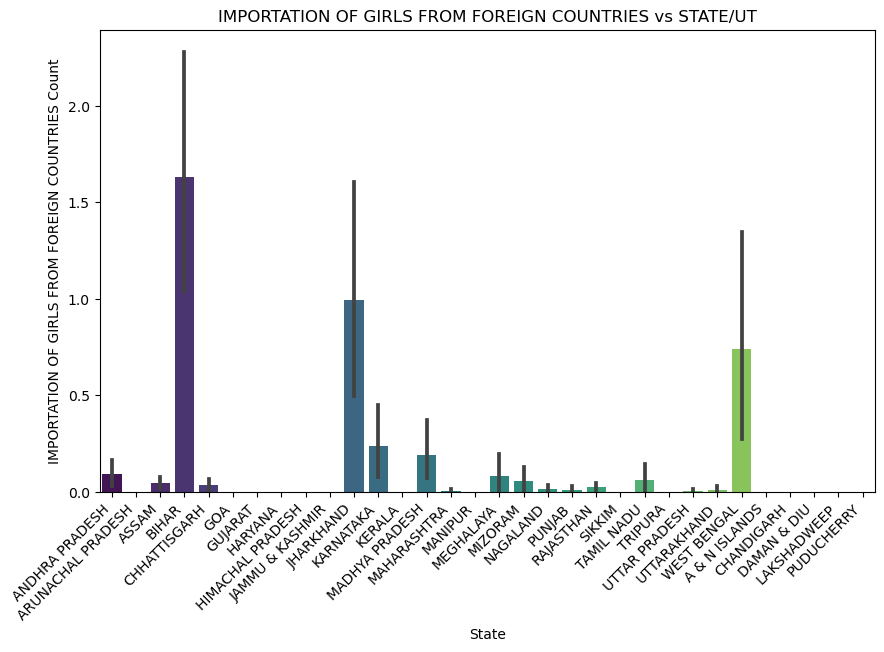

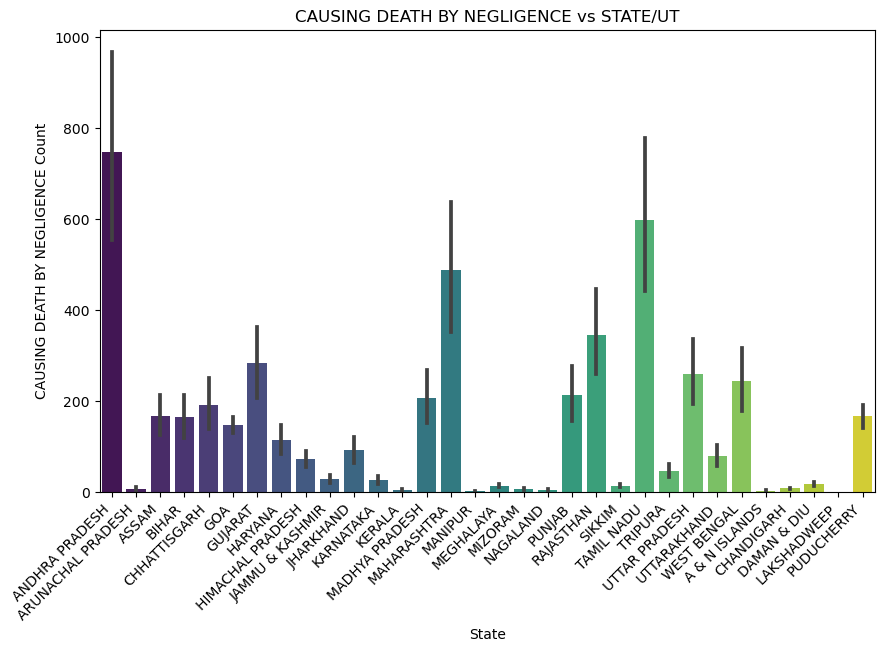

In [25]:
# Loop through each feature and create a separate plot for each
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='STATE/UT', y=feature, data=merged_df, palette='viridis')
    plt.title(f'{feature} vs STATE/UT')
    plt.xlabel('State')
    plt.ylabel(f'{feature} Count')
    plt.xticks(rotation=45, ha='right')  # Rotate X-axis labels for better readability
    plt.show()


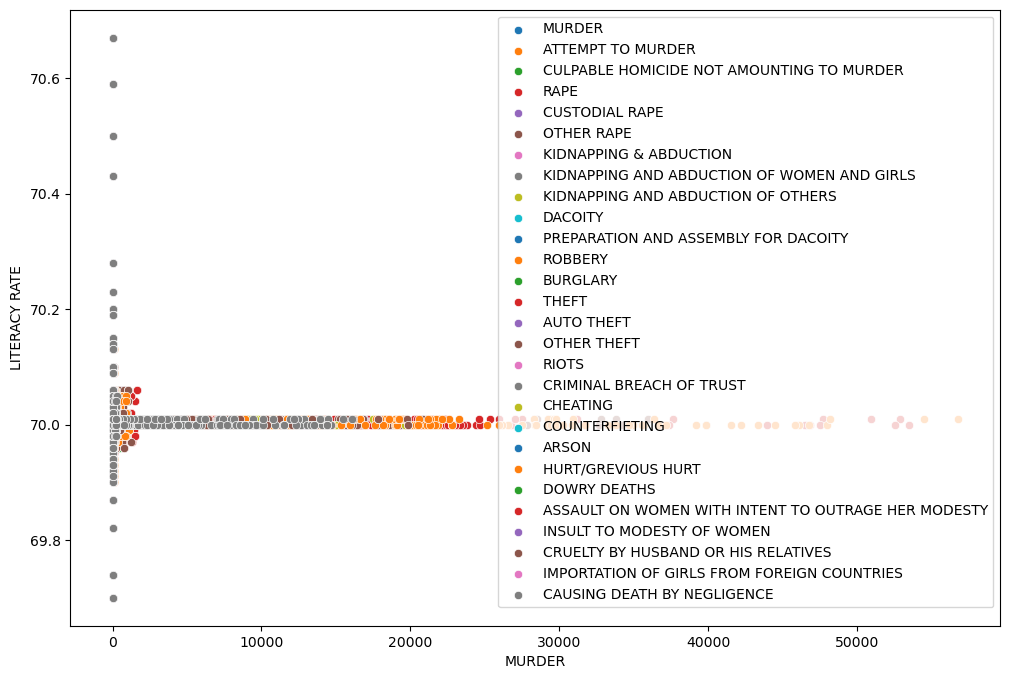

In [26]:
# Scatter plot or Line plot
plt.figure(figsize=(12, 8))

for feature in features:
    sns.scatterplot(x=feature, y='LITERACY RATE', data=merged_df, label=feature)

In [27]:
# Group by year and calculate the total crime for each year
crime_by_year = df.groupby('YEAR')['TOTAL CRIME'].sum().reset_index()

## Phase 2

### 2.3

* #### Analysis of year-on-year total crime rate.



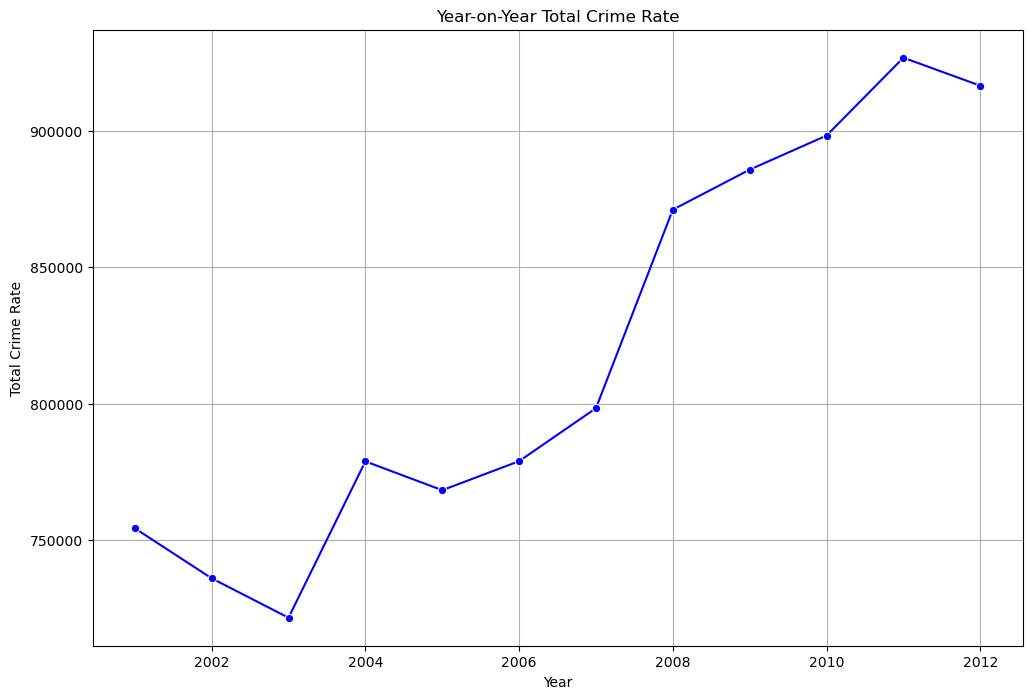

In [28]:
# Line plot or Bar plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='YEAR', y='TOTAL CRIME', data=crime_by_year, marker='o', color='blue')


plt.title('Year-on-Year Total Crime Rate')
plt.xlabel('Year')
plt.ylabel('Total Crime Rate')
plt.grid(True)
plt.show()

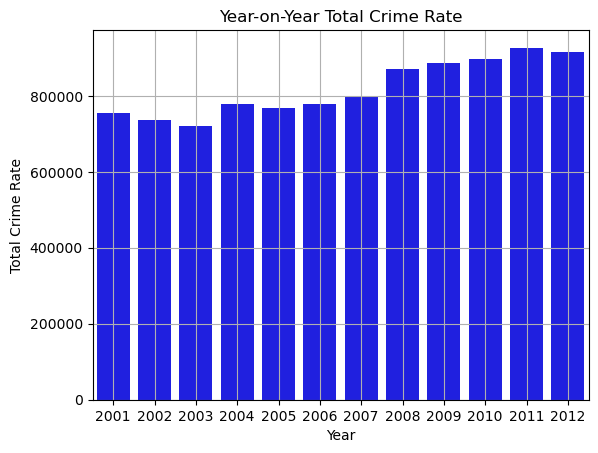

In [29]:
sns.barplot(x='YEAR', y='TOTAL CRIME', data=crime_by_year, color='blue',)

plt.title('Year-on-Year Total Crime Rate')
plt.xlabel('Year')
plt.ylabel('Total Crime Rate')
plt.grid(True)
plt.show()

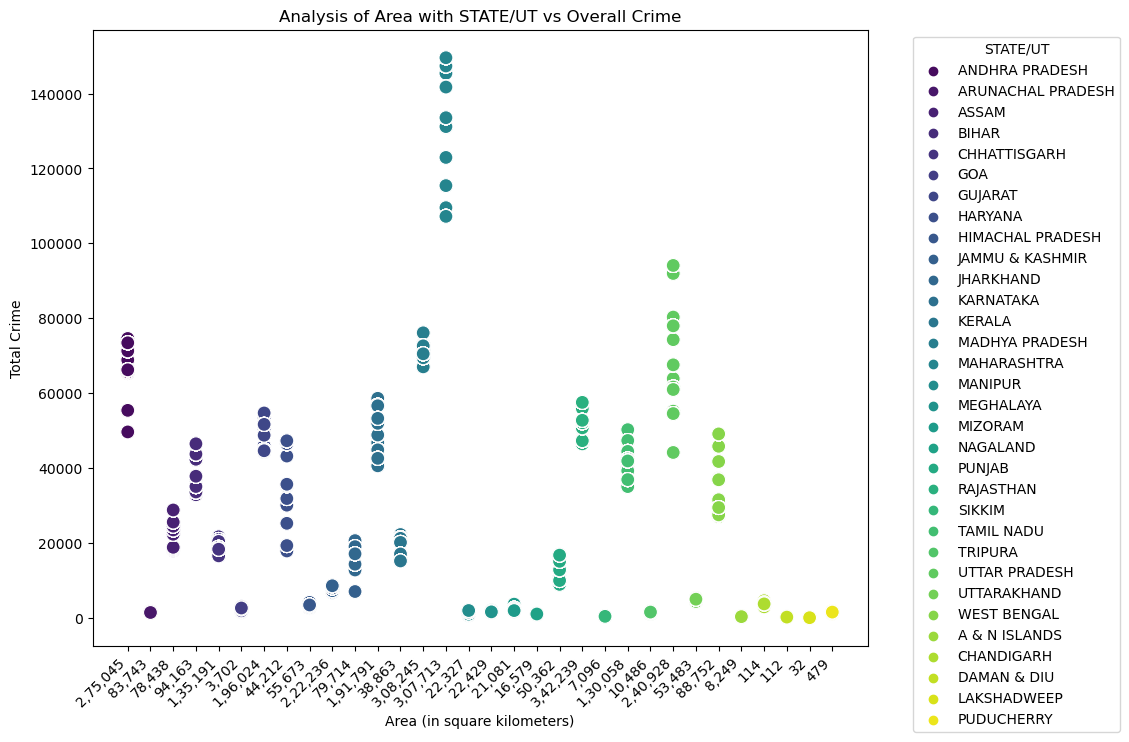

In [30]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='AREA IN (KM2)', y='TOTAL CRIME', data=merged_df, hue='STATE/UT', palette='viridis', s=100)
plt.title('Analysis of Area with STATE/UT vs Overall Crime')
plt.xlabel('Area (in square kilometers)')
plt.ylabel('Total Crime')
plt.xticks(rotation=45, ha='right')
plt.legend(title='STATE/UT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Phase 2

### 2.4
* ### Analysis of area vs overall crime



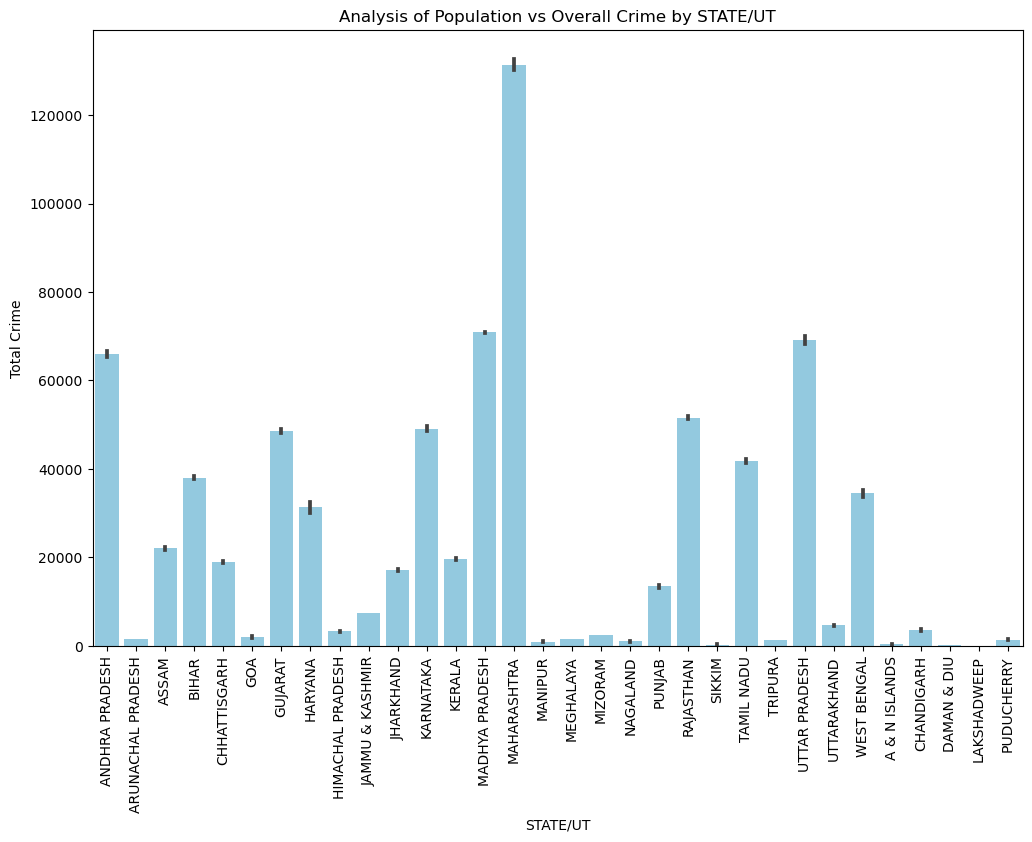

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='TOTAL CRIME', data=merged_df, color='skyblue')
plt.title('Analysis of Population vs Overall Crime by STATE/UT')
plt.xlabel('STATE/UT')
plt.ylabel('Total Crime')
plt.xticks(rotation=90)
plt.show()

## Phase 2

### 2.5
* ### Analysis of Population vs overall Crime



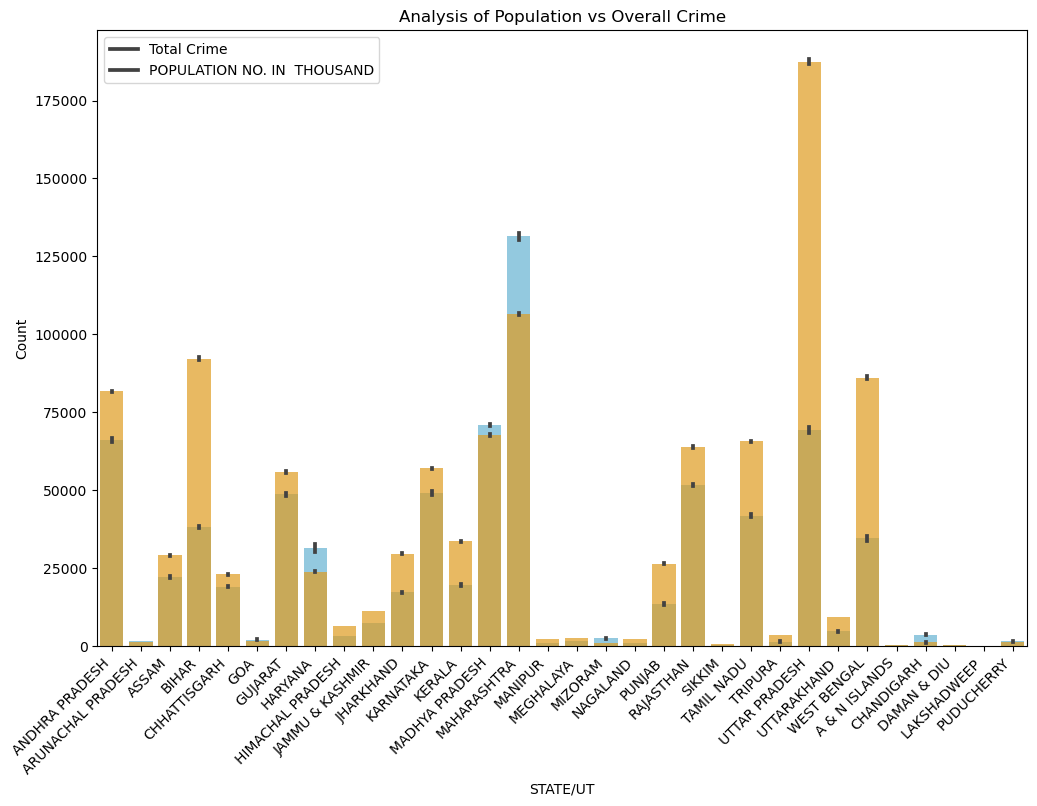

In [40]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='TOTAL CRIME', data=merged_df, color='skyblue')
sns.barplot(x='STATE/UT', y='POPULATION NO. IN  THOUSAND', data=merged_df, color='orange', alpha=0.7)
plt.title('Analysis of Population vs Overall Crime')
plt.xlabel('STATE/UT')
plt.ylabel('Count')
plt.legend(['Total Crime', 'POPULATION NO. IN  THOUSAND'], loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()